In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
plt.style.use('seaborn-whitegrid')
import mlrose_hiive

In [10]:
from sklearn.metrics import accuracy_score

### Optimize the weights for a NN from Assgn.1

In [2]:
df_train = pd.read_csv("FHStrainPCANorm.csv", header=0)
df_test = pd.read_csv("FHStestPCANorm.csv", header=0)

In [3]:
df_train.describe()

,male,age,education.1,education.2,education.3,education.4,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,diabetes,totChol,BMI,heartRate,glucose,PC1,PC2,PC3,label
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,0.070652,0.202904,0.068979,-0.045822,-0.044366,0.009942,0.046054,0.061944,0.094127,0.052757,0.114104,0.071331,0.060900,0.011100,0.155287,0.262275,0.020713,0.041782,0.500000
std,1.008215,1.007319,1.008379,0.978888,0.957487,1.012202,1.000147,1.041911,1.233580,1.318373,1.293435,1.027173,1.034957,0.984411,1.416218,1.678398,0.693951,0.508152,0.500243
min,-0.863443,-1.930344,-0.859808,-0.652444,-0.437940,-0.360904,-0.981162,-0.756154,-0.172460,-0.070962,-0.162222,-2.925639,-2.265783,-2.157149,-1.808957,-3.034642,-2.995928,-1.616158,0.000000
25%,-0.863443,-0.646224,-0.859808,-0.652444,-0.437940,-0.360904,-0.981162,-0.756154,-0.172460,-0.070962,-0.162222,-0.594740,-0.594268,-0.659186,-0.389278,-1.026025,-0.460452,-0.283964,0.000000
50%,-0.863443,0.170943,-0.859808,-0.652444,-0.437940,-0.360904,1.018899,-0.671788,-0.172460,-0.070962,-0.162222,-0.028988,-0.062868,-0.076645,-0.045113,-0.276988,-0.018443,0.008254,0.500000
75%,1.157812,1.104848,1.162708,1.532246,-0.437940,-0.360904,1.018899,0.931152,-0.172460,-0.070962,-0.162222,0.672545,0.620710,0.651532,0.213010,1.557666,0.507860,0.275722,1.000000
max,1.157812,2.388968,1.162708,1.532246,2.282743,2.770005,1.018899,5.149416,5.796752,14.087969,6.162573,8.230993,7.603765,4.084364,13.420325,7.681361,2.566875,2.767503,1.000000


From the above table I see that the train (and, consequently test) set is pre-processed in Assgn.1: normalized and the most correlated features were transformed with PCA.

In [4]:
Y = df_train.label.values
df_train.drop("label", axis=1, inplace=True)
dataset = df_train.values
X = dataset[:,:].astype(float)

In [5]:
Y_test = df_test.label.values
df_test.drop("label", axis=1, inplace=True)
dataset = df_test.values
X_test = dataset[:,:].astype(float)

Let's use as close as possible architecture of the NN to Assgn.1: one hidden layer with 16 nodes. The size of input/ output layers is determined by the task itself but the activation in the output layer (which was Relu in Assgn.1) actually is determined by performance. So I'll check two versions: Relu and Sigmoid activation.

In [6]:
nnRHC2 = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation = 'sigmoid',
                                 algorithm = 'random_hill_climb', restarts=5,
                                 max_iters = 20, clip_max = 5,
                                 bias = True, is_classifier = True, learning_rate = 0.001,
                                 early_stopping = True, max_attempts = 100,
                                 random_state = 13, curve=True)

nnRHC1 = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation = 'relu',
                                 algorithm = 'random_hill_climb', restarts=5,
                                 max_iters = 20, clip_max = 5,
                                 bias = True, is_classifier = True, learning_rate = 0.001,
                                 early_stopping = True, max_attempts = 100,
                                 random_state = 13, curve=True)

In [7]:
nnRHC1.fit(X, Y)
nnRHC2.fit(X, Y)

NeuralNetwork(activation='sigmoid', clip_max=5, curve=True, early_stopping=True,
              hidden_nodes=[16], learning_rate=0.001, max_attempts=100,
              max_iters=20, random_state=13, restarts=5)

In [11]:
y_train_pred1 = nnRHC1.predict(X)
y_train_accuracy1 = accuracy_score(Y, y_train_pred1)
print('Training accuracy: ', y_train_accuracy1)

Training accuracy:  0.5262135922330097


In [12]:
y_train_pred2 = nnRHC2.predict(X)
y_train_accuracy2 = accuracy_score(Y, y_train_pred2)
print('Training accuracy: ', y_train_accuracy2)

Training accuracy:  0.4815533980582524


In [14]:
y_test_pred1 = nnRHC1.predict(X_test)
y_test_accuracy1 = accuracy_score(Y_test, y_test_pred1)
print('Test accuracy: ', y_test_accuracy1)
y_test_pred2 = nnRHC2.predict(X_test)
y_test_accuracy2 = accuracy_score(Y_test, y_test_pred2)
print('Test accuracy: ', y_test_accuracy2)

Test accuracy:  0.3125
Test accuracy:  0.17570754716981132


In [16]:
confusion_matrix(Y_test, y_test_pred1)

array([[165, 554],
       [ 29, 100]], dtype=int64)

In [17]:
confusion_matrix(Y_test, y_test_pred2)

array([[ 33, 686],
       [ 13, 116]], dtype=int64)

In [18]:
print(nnRHC1.loss, nnRHC2.loss)

1.5450970578504462 0.864010950865623


In [19]:
len(nnRHC1.fitness_curve)

20

In [21]:
len(nnRHC2.fitness_curve)

20

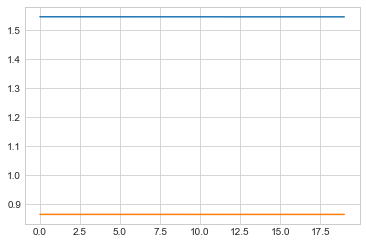

In [22]:
plt.plot(nnRHC1.fitness_curve, label = "relu")
plt.plot(nnRHC2.fitness_curve, label = "sigm")

In [23]:
nnRHC1 = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation = 'relu',
                                 algorithm = 'random_hill_climb', restarts=5,
                                 max_iters = 500, clip_max = 5,
                                 bias = True, is_classifier = True, learning_rate = 0.001,
                                 early_stopping = True, max_attempts = 7,
                                 random_state = 13, curve=True)

nnRHC2 = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation = 'sigmoid',
                                 algorithm = 'random_hill_climb', restarts=5,
                                 max_iters = 500, clip_max = 5,
                                 bias = True, is_classifier = True, learning_rate = 0.001,
                                 early_stopping = True, max_attempts = 7,
                                 random_state = 13, curve=True)

In [24]:
nnRHC1.fit(X, Y)
nnRHC2.fit(X, Y)
y_train_pred1 = nnRHC1.predict(X)
y_train_accuracy1 = accuracy_score(Y, y_train_pred1)
print('Training accuracy: ', y_train_accuracy1)
y_train_pred2 = nnRHC2.predict(X)
y_train_accuracy2 = accuracy_score(Y, y_train_pred2)
print('Training accuracy: ', y_train_accuracy2)

Training accuracy:  0.5262135922330097
Training accuracy:  0.4815533980582524


In [25]:
y_test_pred1 = nnRHC1.predict(X_test)
y_test_accuracy1 = accuracy_score(Y_test, y_test_pred1)
print('Test accuracy: ', y_test_accuracy1)
y_test_pred2 = nnRHC2.predict(X_test)
y_test_accuracy2 = accuracy_score(Y_test, y_test_pred2)
print('Test accuracy: ', y_test_accuracy2)

Test accuracy:  0.3125
Test accuracy:  0.17570754716981132


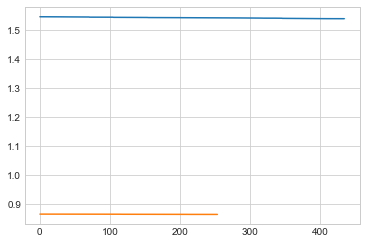

In [26]:
plt.plot(nnRHC1.fitness_curve, label = "relu")
plt.plot(nnRHC2.fitness_curve, label = "sigm")

In [27]:
confusion_matrix(Y_test, y_test_pred1)

array([[165, 554],
       [ 29, 100]], dtype=int64)

In [28]:
confusion_matrix(Y_test, y_test_pred2)

array([[ 33, 686],
       [ 13, 116]], dtype=int64)

In [29]:
nnRHC1 = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation = 'relu',
                                 algorithm = 'random_hill_climb', restarts=5,
                                 max_iters = 500, clip_max = 5,
                                 bias = True, is_classifier = True, learning_rate = 0.01,
                                 early_stopping = True, max_attempts = 7,
                                 random_state = 13, curve=True)

nnRHC2 = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation = 'sigmoid',
                                 algorithm = 'random_hill_climb', restarts=5,
                                 max_iters = 500, clip_max = 5,
                                 bias = True, is_classifier = True, learning_rate = 0.01,
                                 early_stopping = True, max_attempts = 7,
                                 random_state = 13, curve=True)

In [30]:
nnRHC1.fit(X, Y)
nnRHC2.fit(X, Y)
y_train_pred1 = nnRHC1.predict(X)
y_train_accuracy1 = accuracy_score(Y, y_train_pred1)
print('Training accuracy: ', y_train_accuracy1)
y_train_pred2 = nnRHC2.predict(X)
y_train_accuracy2 = accuracy_score(Y, y_train_pred2)
print('Training accuracy: ', y_train_accuracy2)

Training accuracy:  0.5320388349514563
Training accuracy:  0.4796116504854369


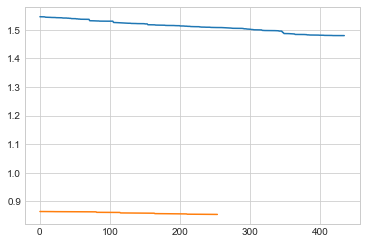

In [31]:
plt.plot(nnRHC1.fitness_curve, label = "relu")
plt.plot(nnRHC2.fitness_curve, label = "sigm")

In [32]:
y_test_pred1 = nnRHC1.predict(X_test)
y_test_accuracy1 = accuracy_score(Y_test, y_test_pred1)
print('Test accuracy: ', y_test_accuracy1)
y_test_pred2 = nnRHC2.predict(X_test)
y_test_accuracy2 = accuracy_score(Y_test, y_test_pred2)
print('Test accuracy: ', y_test_accuracy2)

print(confusion_matrix(Y_test, y_test_pred1))
print(confusion_matrix(Y_test, y_test_pred2))

Test accuracy:  0.32193396226415094
Test accuracy:  0.17570754716981132
[[173 546]
 [ 29 100]]
[[ 33 686]
 [ 13 116]]


Training accuracy:  0.5728155339805825
Training accuracy:  0.5436893203883495


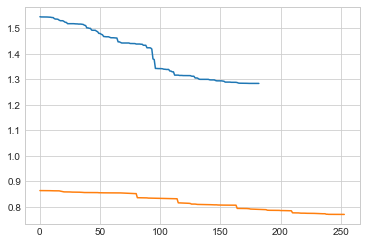

In [33]:
nnRHC1 = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation = 'relu',
                                 algorithm = 'random_hill_climb', restarts=5,
                                 max_iters = 500, clip_max = 5,
                                 bias = True, is_classifier = True, learning_rate = 0.1,
                                 early_stopping = True, max_attempts = 7,
                                 random_state = 13, curve=True)

nnRHC2 = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation = 'sigmoid',
                                 algorithm = 'random_hill_climb', restarts=5,
                                 max_iters = 500, clip_max = 5,
                                 bias = True, is_classifier = True, learning_rate = 0.1,
                                 early_stopping = True, max_attempts = 7,
                                 random_state = 13, curve=True)

nnRHC1.fit(X, Y)
nnRHC2.fit(X, Y)
y_train_pred1 = nnRHC1.predict(X)
y_train_accuracy1 = accuracy_score(Y, y_train_pred1)
print('Training accuracy: ', y_train_accuracy1)
y_train_pred2 = nnRHC2.predict(X)
y_train_accuracy2 = accuracy_score(Y, y_train_pred2)
print('Training accuracy: ', y_train_accuracy2)

plt.plot(nnRHC1.fitness_curve, label = "relu")
plt.plot(nnRHC2.fitness_curve, label = "sigm")

In [35]:
y_test_pred1 = nnRHC1.predict(X_test)
y_test_accuracy1 = accuracy_score(Y_test, y_test_pred1)
print('Test accuracy with relu: ', y_test_accuracy1)
y_test_pred2 = nnRHC2.predict(X_test)
y_test_accuracy2 = accuracy_score(Y_test, y_test_pred2)
print('Test accuracy with sigmoid: ', y_test_accuracy2)

print(confusion_matrix(Y_test, y_test_pred1))
print(confusion_matrix(Y_test, y_test_pred2))

Test accuracy with relu:  0.49764150943396224
Test accuracy with sigmoid:  0.3231132075471698
[[329 390]
 [ 36  93]]
[[173 546]
 [ 28 101]]


Training accuracy:  0.6262135922330098
Training accuracy:  0.596116504854369


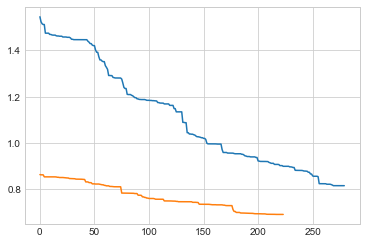

In [36]:
nnRHC1 = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation = 'relu',
                                 algorithm = 'random_hill_climb', restarts=5,
                                 max_iters = 500, clip_max = 5,
                                 bias = True, is_classifier = True, learning_rate = 0.3,
                                 early_stopping = True, max_attempts = 7,
                                 random_state = 13, curve=True)

nnRHC2 = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation = 'sigmoid',
                                 algorithm = 'random_hill_climb', restarts=5,
                                 max_iters = 500, clip_max = 5,
                                 bias = True, is_classifier = True, learning_rate = 0.3,
                                 early_stopping = True, max_attempts = 7,
                                 random_state = 13, curve=True)

nnRHC1.fit(X, Y)
nnRHC2.fit(X, Y)
y_train_pred1 = nnRHC1.predict(X)
y_train_accuracy1 = accuracy_score(Y, y_train_pred1)
print('Training accuracy: ', y_train_accuracy1)
y_train_pred2 = nnRHC2.predict(X)
y_train_accuracy2 = accuracy_score(Y, y_train_pred2)
print('Training accuracy: ', y_train_accuracy2)

plt.plot(nnRHC1.fitness_curve, label = "relu")
plt.plot(nnRHC2.fitness_curve, label = "sigm")

In [37]:
y_test_pred1 = nnRHC1.predict(X_test)
y_test_accuracy1 = accuracy_score(Y_test, y_test_pred1)
print('Test accuracy with relu: ', y_test_accuracy1)
y_test_pred2 = nnRHC2.predict(X_test)
y_test_accuracy2 = accuracy_score(Y_test, y_test_pred2)
print('Test accuracy with sigmoid: ', y_test_accuracy2)

print(confusion_matrix(Y_test, y_test_pred1))
print(confusion_matrix(Y_test, y_test_pred2))

Test accuracy with relu:  0.6037735849056604
Test accuracy with sigmoid:  0.6143867924528302
[[436 283]
 [ 53  76]]
[[453 266]
 [ 61  68]]


Training accuracy:  0.6310679611650486
Training accuracy:  0.6728155339805825


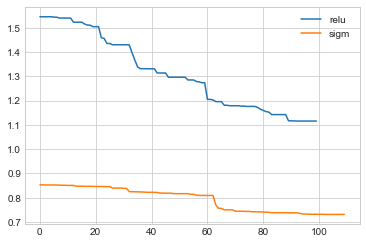

In [38]:
nnRHC1 = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation = 'relu',
                                 algorithm = 'random_hill_climb', restarts=5,
                                 max_iters = 500, clip_max = 5,
                                 bias = True, is_classifier = True, learning_rate = 0.5,
                                 early_stopping = True, max_attempts = 7,
                                 random_state = 13, curve=True)

nnRHC2 = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation = 'sigmoid',
                                 algorithm = 'random_hill_climb', restarts=5,
                                 max_iters = 500, clip_max = 5,
                                 bias = True, is_classifier = True, learning_rate = 0.5,
                                 early_stopping = True, max_attempts = 7,
                                 random_state = 13, curve=True)

nnRHC1.fit(X, Y)
nnRHC2.fit(X, Y)
y_train_pred1 = nnRHC1.predict(X)
y_train_accuracy1 = accuracy_score(Y, y_train_pred1)
print('Training accuracy: ', y_train_accuracy1)
y_train_pred2 = nnRHC2.predict(X)
y_train_accuracy2 = accuracy_score(Y, y_train_pred2)
print('Training accuracy: ', y_train_accuracy2)

plt.plot(nnRHC1.fitness_curve, label = "relu")
plt.plot(nnRHC2.fitness_curve, label = "sigm")
plt.legend(loc='upper right')

In [39]:
y_test_pred1 = nnRHC1.predict(X_test)
y_test_accuracy1 = accuracy_score(Y_test, y_test_pred1)
print('Test accuracy with relu: ', y_test_accuracy1)
y_test_pred2 = nnRHC2.predict(X_test)
y_test_accuracy2 = accuracy_score(Y_test, y_test_pred2)
print('Test accuracy with sigmoid: ', y_test_accuracy2)

print(confusion_matrix(Y_test, y_test_pred1))
print(confusion_matrix(Y_test, y_test_pred2))

Test accuracy with relu:  0.5719339622641509
Test accuracy with sigmoid:  0.5707547169811321
[[410 309]
 [ 54  75]]
[[386 333]
 [ 31  98]]


Training accuracy:  0.5893203883495146
Training accuracy:  0.6398058252427185


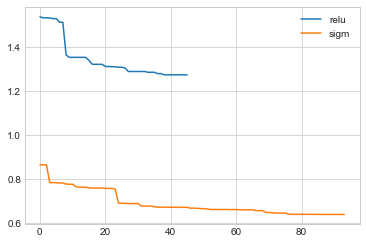

In [40]:
nnRHC1 = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation = 'relu',
                                 algorithm = 'random_hill_climb', restarts=5,
                                 max_iters = 500, clip_max = 5,
                                 bias = True, is_classifier = True, learning_rate = 0.75,
                                 early_stopping = True, max_attempts = 7,
                                 random_state = 13, curve=True)

nnRHC2 = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation = 'sigmoid',
                                 algorithm = 'random_hill_climb', restarts=5,
                                 max_iters = 500, clip_max = 5,
                                 bias = True, is_classifier = True, learning_rate = 0.75,
                                 early_stopping = True, max_attempts = 7,
                                 random_state = 13, curve=True)

nnRHC1.fit(X, Y)
nnRHC2.fit(X, Y)
y_train_pred1 = nnRHC1.predict(X)
y_train_accuracy1 = accuracy_score(Y, y_train_pred1)
print('Training accuracy: ', y_train_accuracy1)
y_train_pred2 = nnRHC2.predict(X)
y_train_accuracy2 = accuracy_score(Y, y_train_pred2)
print('Training accuracy: ', y_train_accuracy2)

plt.plot(nnRHC1.fitness_curve, label = "relu")
plt.plot(nnRHC2.fitness_curve, label = "sigm")
plt.legend(loc='upper right')

In [41]:
y_test_pred1 = nnRHC1.predict(X_test)
y_test_accuracy1 = accuracy_score(Y_test, y_test_pred1)
print('Test accuracy with relu: ', y_test_accuracy1)
y_test_pred2 = nnRHC2.predict(X_test)
y_test_accuracy2 = accuracy_score(Y_test, y_test_pred2)
print('Test accuracy with sigmoid: ', y_test_accuracy2)

print(confusion_matrix(Y_test, y_test_pred1))
print(confusion_matrix(Y_test, y_test_pred2))

Test accuracy with relu:  0.6084905660377359
Test accuracy with sigmoid:  0.5849056603773585
[[448 271]
 [ 61  68]]
[[404 315]
 [ 37  92]]


Training accuracy:  0.583495145631068
Training accuracy:  0.6728155339805825


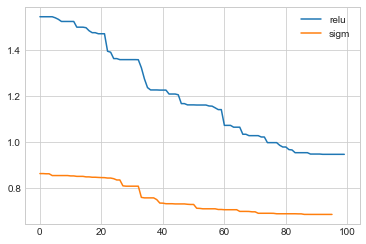

In [42]:
nnRHC1 = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation = 'relu',
                                 algorithm = 'random_hill_climb', restarts=5,
                                 max_iters = 500, clip_max = 5,
                                 bias = True, is_classifier = True, learning_rate = 1.0,
                                 early_stopping = True, max_attempts = 7,
                                 random_state = 13, curve=True)

nnRHC2 = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation = 'sigmoid',
                                 algorithm = 'random_hill_climb', restarts=5,
                                 max_iters = 500, clip_max = 5,
                                 bias = True, is_classifier = True, learning_rate = 1.0,
                                 early_stopping = True, max_attempts = 7,
                                 random_state = 13, curve=True)

nnRHC1.fit(X, Y)
nnRHC2.fit(X, Y)
y_train_pred1 = nnRHC1.predict(X)
y_train_accuracy1 = accuracy_score(Y, y_train_pred1)
print('Training accuracy: ', y_train_accuracy1)
y_train_pred2 = nnRHC2.predict(X)
y_train_accuracy2 = accuracy_score(Y, y_train_pred2)
print('Training accuracy: ', y_train_accuracy2)

plt.plot(nnRHC1.fitness_curve, label = "relu")
plt.plot(nnRHC2.fitness_curve, label = "sigm")
plt.legend(loc='upper right')

In [43]:
y_test_pred1 = nnRHC1.predict(X_test)
y_test_accuracy1 = accuracy_score(Y_test, y_test_pred1)
print('Test accuracy with relu: ', y_test_accuracy1)
y_test_pred2 = nnRHC2.predict(X_test)
y_test_accuracy2 = accuracy_score(Y_test, y_test_pred2)
print('Test accuracy with sigmoid: ', y_test_accuracy2)

print(confusion_matrix(Y_test, y_test_pred1))
print(confusion_matrix(Y_test, y_test_pred2))

Test accuracy with relu:  0.5648584905660378
Test accuracy with sigmoid:  0.6438679245283019
[[404 315]
 [ 54  75]]
[[465 254]
 [ 48  81]]


In [44]:
nnRHC1.loss

0.8321718912693559

In [45]:
nnRHC2.loss

0.6007298667172292

With higher l.r. it needs less iterations to learn. Test accuracy depens on activation used and l.r. - tstAcc vs l.r. could be plotted

In [46]:
nnRHC1 = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation = 'relu',
                                 algorithm = 'gradient_descent', 
                                 max_iters = 500, clip_max = 5,
                                 bias = True, is_classifier = True, learning_rate = 0.01,
                                 early_stopping = True, max_attempts = 7,
                                 random_state = 13, curve=True)
nnRHC2 = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation = 'sigmoid',
                                 algorithm = 'gradient_descent', 
                                 max_iters = 500, clip_max = 5,
                                 bias = True, is_classifier = True, learning_rate = 0.01,
                                 early_stopping = True, max_attempts = 7,
                                 random_state = 13, curve=True)

In [47]:
nnRHC1.fit(X, Y)
nnRHC2.fit(X, Y)

NeuralNetwork(activation='sigmoid', algorithm='gradient_descent', clip_max=5,
              curve=True, early_stopping=True, hidden_nodes=[16],
              learning_rate=0.01, max_attempts=7, max_iters=500,
              random_state=13)

Training accuracy:  0.5262135922330097
Training accuracy:  0.6932038834951456


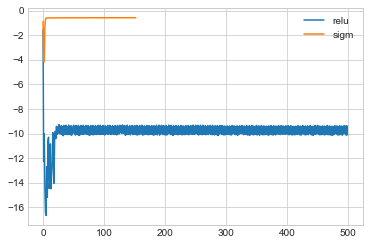

In [48]:
y_train_pred1 = nnRHC1.predict(X)
y_train_accuracy1 = accuracy_score(Y, y_train_pred1)
print('Training accuracy: ', y_train_accuracy1)
y_train_pred2 = nnRHC2.predict(X)
y_train_accuracy2 = accuracy_score(Y, y_train_pred2)
print('Training accuracy: ', y_train_accuracy2)

plt.plot(nnRHC1.fitness_curve, label = "relu")
plt.plot(nnRHC2.fitness_curve, label = "sigm")
plt.legend(loc='upper right')

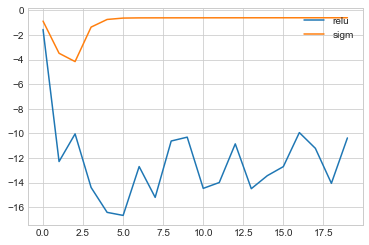

In [49]:
plt.plot(nnRHC1.fitness_curve[:20], label = "relu")
plt.plot(nnRHC2.fitness_curve[:20], label = "sigm")
plt.legend(loc='upper right')

In [51]:
print(nnRHC1.loss, nnRHC2.loss)

1.545684108537027 0.5798689451175967


In [50]:
y_test_pred1 = nnRHC1.predict(X_test)
y_test_accuracy1 = accuracy_score(Y_test, y_test_pred1)
print('Test accuracy with relu: ', y_test_accuracy1)
y_test_pred2 = nnRHC2.predict(X_test)
y_test_accuracy2 = accuracy_score(Y_test, y_test_pred2)
print('Test accuracy with sigmoid: ', y_test_accuracy2)

print(confusion_matrix(Y_test, y_test_pred1))
print(confusion_matrix(Y_test, y_test_pred2))

Test accuracy with relu:  0.3125
Test accuracy with sigmoid:  0.6485849056603774
[[165 554]
 [ 29 100]]
[[467 252]
 [ 46  83]]


In [52]:
nnRHC1 = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation = 'relu',
                                 algorithm = 'gradient_descent', 
                                 max_iters = 500, clip_max = 5,
                                 bias = True, is_classifier = True, learning_rate = 0.05,
                                 early_stopping = True, max_attempts = 7,
                                 random_state = 13, curve=True)
nnRHC2 = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation = 'sigmoid',
                                 algorithm = 'gradient_descent', 
                                 max_iters = 500, clip_max = 5,
                                 bias = True, is_classifier = True, learning_rate = 0.05,
                                 early_stopping = True, max_attempts = 7,
                                 random_state = 13, curve=True)
nnRHC1.fit(X, Y)
nnRHC2.fit(X, Y)

NeuralNetwork(activation='sigmoid', algorithm='gradient_descent', clip_max=5,
              curve=True, early_stopping=True, hidden_nodes=[16],
              learning_rate=0.05, max_attempts=7, max_iters=500,
              random_state=13)

Training accuracy:  0.5262135922330097
Training accuracy:  0.4815533980582524


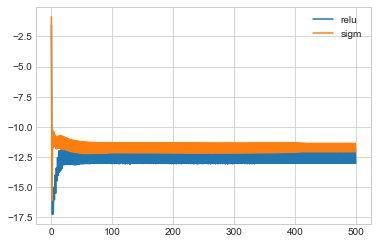

In [53]:
y_train_pred1 = nnRHC1.predict(X)
y_train_accuracy1 = accuracy_score(Y, y_train_pred1)
print('Training accuracy: ', y_train_accuracy1)
y_train_pred2 = nnRHC2.predict(X)
y_train_accuracy2 = accuracy_score(Y, y_train_pred2)
print('Training accuracy: ', y_train_accuracy2)

plt.plot(nnRHC1.fitness_curve, label = "relu")
plt.plot(nnRHC2.fitness_curve, label = "sigm")
plt.legend(loc='upper right')

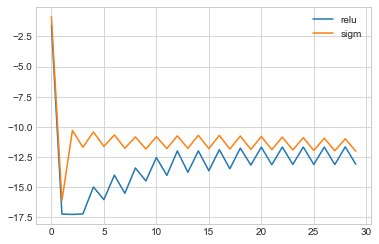

In [54]:
plt.plot(nnRHC1.fitness_curve[:30], label = "relu")
plt.plot(nnRHC2.fitness_curve[:30], label = "sigm")
plt.legend(loc='upper right')

In [55]:
print(nnRHC1.loss, nnRHC2.loss)

1.545684108537027 0.864171984239808


In [56]:
y_test_pred1 = nnRHC1.predict(X_test)
y_test_accuracy1 = accuracy_score(Y_test, y_test_pred1)
print('Test accuracy with relu: ', y_test_accuracy1)
y_test_pred2 = nnRHC2.predict(X_test)
y_test_accuracy2 = accuracy_score(Y_test, y_test_pred2)
print('Test accuracy with sigmoid: ', y_test_accuracy2)

print(confusion_matrix(Y_test, y_test_pred1))
print(confusion_matrix(Y_test, y_test_pred2))

Test accuracy with relu:  0.3125
Test accuracy with sigmoid:  0.17570754716981132
[[165 554]
 [ 29 100]]
[[ 33 686]
 [ 13 116]]


In [57]:
nnRHC1 = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation = 'relu',
                                 algorithm = 'gradient_descent', 
                                 max_iters = 500, clip_max = 5,
                                 bias = True, is_classifier = True, learning_rate = 0.1,
                                 early_stopping = True, max_attempts = 7,
                                 random_state = 13, curve=True)
nnRHC2 = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation = 'sigmoid',
                                 algorithm = 'gradient_descent', 
                                 max_iters = 500, clip_max = 5,
                                 bias = True, is_classifier = True, learning_rate = 0.1,
                                 early_stopping = True, max_attempts = 7,
                                 random_state = 13, curve=True)
nnRHC1.fit(X, Y)
nnRHC2.fit(X, Y)

NeuralNetwork(activation='sigmoid', algorithm='gradient_descent', clip_max=5,
              curve=True, early_stopping=True, hidden_nodes=[16],
              max_attempts=7, max_iters=500, random_state=13)

Training accuracy:  0.5262135922330097
Training accuracy:  0.4815533980582524


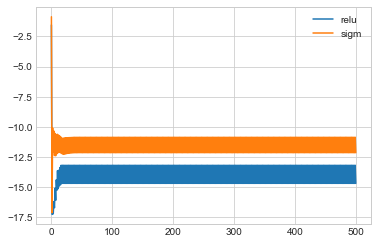

In [58]:
y_train_pred1 = nnRHC1.predict(X)
y_train_accuracy1 = accuracy_score(Y, y_train_pred1)
print('Training accuracy: ', y_train_accuracy1)
y_train_pred2 = nnRHC2.predict(X)
y_train_accuracy2 = accuracy_score(Y, y_train_pred2)
print('Training accuracy: ', y_train_accuracy2)

plt.plot(nnRHC1.fitness_curve, label = "relu")
plt.plot(nnRHC2.fitness_curve, label = "sigm")
plt.legend(loc='upper right')

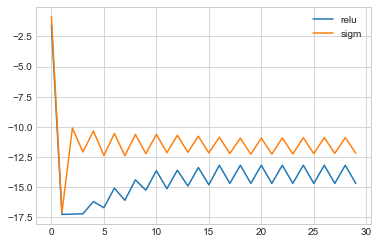

In [59]:
plt.plot(nnRHC1.fitness_curve[:30], label = "relu")
plt.plot(nnRHC2.fitness_curve[:30], label = "sigm")
plt.legend(loc='upper right')

In [60]:
print(nnRHC1.loss, nnRHC2.loss)

1.545684108537027 0.864171984239808


In [61]:
y_test_pred1 = nnRHC1.predict(X_test)
y_test_accuracy1 = accuracy_score(Y_test, y_test_pred1)
print('Test accuracy with relu: ', y_test_accuracy1)
y_test_pred2 = nnRHC2.predict(X_test)
y_test_accuracy2 = accuracy_score(Y_test, y_test_pred2)
print('Test accuracy with sigmoid: ', y_test_accuracy2)

print(confusion_matrix(Y_test, y_test_pred1))
print(confusion_matrix(Y_test, y_test_pred2))

Test accuracy with relu:  0.3125
Test accuracy with sigmoid:  0.17570754716981132
[[165 554]
 [ 29 100]]
[[ 33 686]
 [ 13 116]]


In [62]:
nnRHC1 = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation = 'relu',
                                 algorithm = 'gradient_descent', 
                                 max_iters = 500, clip_max = 5,
                                 bias = True, is_classifier = True, learning_rate = 0.25,
                                 early_stopping = True, max_attempts = 7,
                                 random_state = 13, curve=True)
nnRHC2 = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation = 'sigmoid',
                                 algorithm = 'gradient_descent', 
                                 max_iters = 500, clip_max = 5,
                                 bias = True, is_classifier = True, learning_rate = 0.25,
                                 early_stopping = True, max_attempts = 7,
                                 random_state = 13, curve=True)
nnRHC1.fit(X, Y)
nnRHC2.fit(X, Y)

NeuralNetwork(activation='sigmoid', algorithm='gradient_descent', clip_max=5,
              curve=True, early_stopping=True, hidden_nodes=[16],
              learning_rate=0.25, max_attempts=7, max_iters=500,
              random_state=13)

Training accuracy:  0.5262135922330097
Training accuracy:  0.4815533980582524


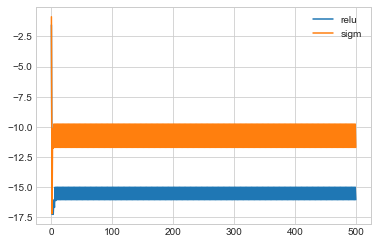

In [63]:
y_train_pred1 = nnRHC1.predict(X)
y_train_accuracy1 = accuracy_score(Y, y_train_pred1)
print('Training accuracy: ', y_train_accuracy1)
y_train_pred2 = nnRHC2.predict(X)
y_train_accuracy2 = accuracy_score(Y, y_train_pred2)
print('Training accuracy: ', y_train_accuracy2)

plt.plot(nnRHC1.fitness_curve, label = "relu")
plt.plot(nnRHC2.fitness_curve, label = "sigm")
plt.legend(loc='upper right')

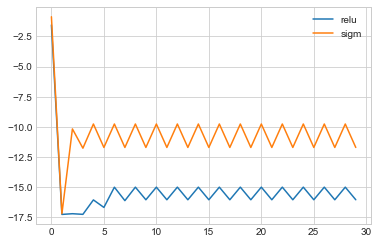

In [64]:
plt.plot(nnRHC1.fitness_curve[:30], label = "relu")
plt.plot(nnRHC2.fitness_curve[:30], label = "sigm")
plt.legend(loc='upper right')

In [65]:
print(nnRHC1.loss, nnRHC2.loss)

1.545684108537027 0.864171984239808


In [66]:
y_test_pred1 = nnRHC1.predict(X_test)
y_test_accuracy1 = accuracy_score(Y_test, y_test_pred1)
print('Test accuracy with relu: ', y_test_accuracy1)
y_test_pred2 = nnRHC2.predict(X_test)
y_test_accuracy2 = accuracy_score(Y_test, y_test_pred2)
print('Test accuracy with sigmoid: ', y_test_accuracy2)

print(confusion_matrix(Y_test, y_test_pred1))
print(confusion_matrix(Y_test, y_test_pred2))

Test accuracy with relu:  0.3125
Test accuracy with sigmoid:  0.17570754716981132
[[165 554]
 [ 29 100]]
[[ 33 686]
 [ 13 116]]


In [67]:
nnRHC1 = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation = 'relu',
                                 algorithm = 'gradient_descent', 
                                 max_iters = 500, clip_max = 5,
                                 bias = True, is_classifier = True, learning_rate = 0.005,
                                 early_stopping = True, max_attempts = 7,
                                 random_state = 13, curve=True)
nnRHC2 = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation = 'sigmoid',
                                 algorithm = 'gradient_descent', 
                                 max_iters = 500, clip_max = 5,
                                 bias = True, is_classifier = True, learning_rate = 0.005,
                                 early_stopping = True, max_attempts = 7,
                                 random_state = 13, curve=True)
nnRHC1.fit(X, Y)
nnRHC2.fit(X, Y)

NeuralNetwork(activation='sigmoid', algorithm='gradient_descent', clip_max=5,
              curve=True, early_stopping=True, hidden_nodes=[16],
              learning_rate=0.005, max_attempts=7, max_iters=500,
              random_state=13)

Training accuracy:  0.7572815533980582
Training accuracy:  0.6961165048543689


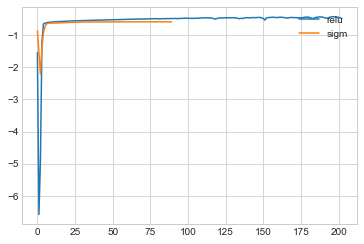

In [68]:
y_train_pred1 = nnRHC1.predict(X)
y_train_accuracy1 = accuracy_score(Y, y_train_pred1)
print('Training accuracy: ', y_train_accuracy1)
y_train_pred2 = nnRHC2.predict(X)
y_train_accuracy2 = accuracy_score(Y, y_train_pred2)
print('Training accuracy: ', y_train_accuracy2)

plt.plot(nnRHC1.fitness_curve, label = "relu")
plt.plot(nnRHC2.fitness_curve, label = "sigm")
plt.legend(loc='upper right')

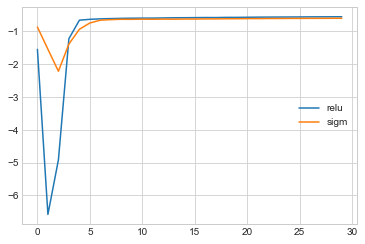

In [70]:
plt.plot(nnRHC1.fitness_curve[:30], label = "relu")
plt.plot(nnRHC2.fitness_curve[:30], label = "sigm")
plt.legend(loc='right')

In [71]:
print(nnRHC1.loss, nnRHC2.loss)

0.42967794372725915 0.5883204299600342


In [72]:
y_test_pred1 = nnRHC1.predict(X_test)
y_test_accuracy1 = accuracy_score(Y_test, y_test_pred1)
print('Test accuracy with relu: ', y_test_accuracy1)
y_test_pred2 = nnRHC2.predict(X_test)
y_test_accuracy2 = accuracy_score(Y_test, y_test_pred2)
print('Test accuracy with sigmoid: ', y_test_accuracy2)

print(confusion_matrix(Y_test, y_test_pred1))
print(confusion_matrix(Y_test, y_test_pred2))

Test accuracy with relu:  0.6875
Test accuracy with sigmoid:  0.6403301886792453
[[524 195]
 [ 70  59]]
[[464 255]
 [ 50  79]]


In [73]:
nnRHC1 = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation = 'relu',
                                 algorithm = 'gradient_descent', 
                                 max_iters = 500, clip_max = 5,
                                 bias = True, is_classifier = True, learning_rate = 0.0025,
                                 early_stopping = True, max_attempts = 7,
                                 random_state = 13, curve=True)
nnRHC2 = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation = 'sigmoid',
                                 algorithm = 'gradient_descent', 
                                 max_iters = 500, clip_max = 5,
                                 bias = True, is_classifier = True, learning_rate = 0.0025,
                                 early_stopping = True, max_attempts = 7,
                                 random_state = 13, curve=True)
nnRHC1.fit(X, Y)
nnRHC2.fit(X, Y)

NeuralNetwork(activation='sigmoid', algorithm='gradient_descent', clip_max=5,
              curve=True, early_stopping=True, hidden_nodes=[16],
              learning_rate=0.0025, max_attempts=7, max_iters=500,
              random_state=13)

Training accuracy:  0.7349514563106796
Training accuracy:  0.6893203883495146


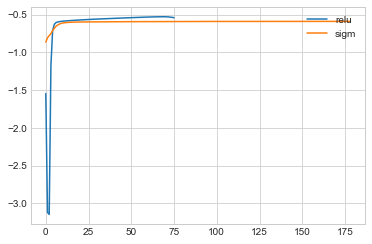

In [74]:
y_train_pred1 = nnRHC1.predict(X)
y_train_accuracy1 = accuracy_score(Y, y_train_pred1)
print('Training accuracy: ', y_train_accuracy1)
y_train_pred2 = nnRHC2.predict(X)
y_train_accuracy2 = accuracy_score(Y, y_train_pred2)
print('Training accuracy: ', y_train_accuracy2)

plt.plot(nnRHC1.fitness_curve, label = "relu")
plt.plot(nnRHC2.fitness_curve, label = "sigm")
plt.legend(loc='upper right')

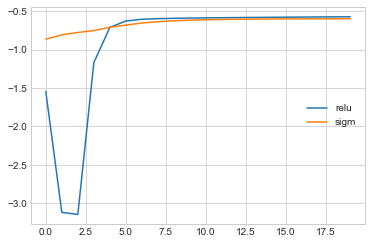

In [75]:
plt.plot(nnRHC1.fitness_curve[:20], label = "relu")
plt.plot(nnRHC2.fitness_curve[:20], label = "sigm")
plt.legend(loc='right')

In [76]:
print(nnRHC1.loss, nnRHC2.loss)

0.5277379928236281 0.5890066816578619


In [77]:
y_test_pred1 = nnRHC1.predict(X_test)
y_test_accuracy1 = accuracy_score(Y_test, y_test_pred1)
print('Test accuracy with relu: ', y_test_accuracy1)
y_test_pred2 = nnRHC2.predict(X_test)
y_test_accuracy2 = accuracy_score(Y_test, y_test_pred2)
print('Test accuracy with sigmoid: ', y_test_accuracy2)

print(confusion_matrix(Y_test, y_test_pred1))
print(confusion_matrix(Y_test, y_test_pred2))

Test accuracy with relu:  0.6096698113207547
Test accuracy with sigmoid:  0.6214622641509434
[[437 282]
 [ 49  80]]
[[443 276]
 [ 45  84]]


In [78]:
nnRHC1 = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation = 'relu',
                                 algorithm = 'gradient_descent', 
                                 max_iters = 500, clip_max = 5,
                                 bias = True, is_classifier = True, learning_rate = 0.001,
                                 early_stopping = True, max_attempts = 7,
                                 random_state = 13, curve=True)
nnRHC2 = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation = 'sigmoid',
                                 algorithm = 'gradient_descent', 
                                 max_iters = 500, clip_max = 5,
                                 bias = True, is_classifier = True, learning_rate = 0.001,
                                 early_stopping = True, max_attempts = 7,
                                 random_state = 13, curve=True)
nnRHC1.fit(X, Y)
nnRHC2.fit(X, Y)

NeuralNetwork(activation='sigmoid', algorithm='gradient_descent', clip_max=5,
              curve=True, early_stopping=True, hidden_nodes=[16],
              learning_rate=0.001, max_attempts=7, max_iters=500,
              random_state=13)

Training accuracy:  0.7475728155339806
Training accuracy:  0.6902912621359223


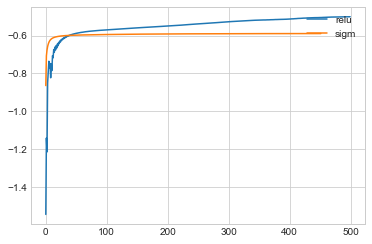

In [79]:
y_train_pred1 = nnRHC1.predict(X)
y_train_accuracy1 = accuracy_score(Y, y_train_pred1)
print('Training accuracy: ', y_train_accuracy1)
y_train_pred2 = nnRHC2.predict(X)
y_train_accuracy2 = accuracy_score(Y, y_train_pred2)
print('Training accuracy: ', y_train_accuracy2)

plt.plot(nnRHC1.fitness_curve, label = "relu")
plt.plot(nnRHC2.fitness_curve, label = "sigm")
plt.legend(loc='upper right')

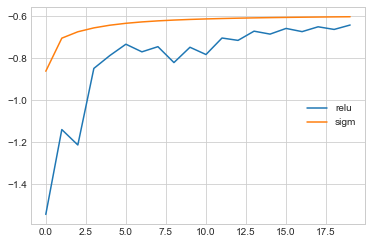

In [80]:
plt.plot(nnRHC1.fitness_curve[:20], label = "relu")
plt.plot(nnRHC2.fitness_curve[:20], label = "sigm")
plt.legend(loc='right')

In [81]:
print(nnRHC1.loss, nnRHC2.loss)

0.500039061581105 0.5889842369414454


In [82]:
y_test_pred1 = nnRHC1.predict(X_test)
y_test_accuracy1 = accuracy_score(Y_test, y_test_pred1)
print('Test accuracy with relu: ', y_test_accuracy1)
y_test_pred2 = nnRHC2.predict(X_test)
y_test_accuracy2 = accuracy_score(Y_test, y_test_pred2)
print('Test accuracy with sigmoid: ', y_test_accuracy2)

print(confusion_matrix(Y_test, y_test_pred1))
print(confusion_matrix(Y_test, y_test_pred2))

Test accuracy with relu:  0.5719339622641509
Test accuracy with sigmoid:  0.6191037735849056
[[397 322]
 [ 41  88]]
[[441 278]
 [ 45  84]]


SGD has a sweet spot for l.r. Higher l.r. makes loss oscilate 

In [84]:
scheduleNN = mlrose_hiive.GeomDecay(init_temp=10.0, decay=0.95, min_temp=0.1)
nnSA1 = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation = 'relu',
                                 algorithm = 'simulated_annealing', 
                                 max_iters = 500, clip_max = 5, schedule=scheduleNN,
                                 bias = True, is_classifier = True, learning_rate = 0.1,
                                 early_stopping = True, max_attempts = 7,
                                 random_state = 13, curve=True)
nnSA2 = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation = 'sigmoid',
                                 algorithm = 'simulated_annealing', schedule=scheduleNN, 
                                 max_iters = 500, clip_max = 5,
                                 bias = True, is_classifier = True, learning_rate = 0.1,
                                 early_stopping = True, max_attempts = 7,
                                 random_state = 13, curve=True)
nnSA1.fit(X, Y)
nnSA2.fit(X, Y)

NeuralNetwork(activation='sigmoid', algorithm='simulated_annealing', clip_max=5,
              curve=True, early_stopping=True, hidden_nodes=[16],
              max_attempts=7, max_iters=500, random_state=13,
              schedule=GeomDecay(init_temp=10.0, decay=0.95, min_temp=0.1))

Training accuracy:  0.5427184466019418
Training accuracy:  0.4786407766990291


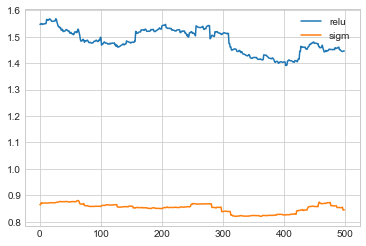

In [85]:
y_train_pred1 = nnSA1.predict(X)
y_train_accuracy1 = accuracy_score(Y, y_train_pred1)
print('Training accuracy: ', y_train_accuracy1)
y_train_pred2 = nnSA2.predict(X)
y_train_accuracy2 = accuracy_score(Y, y_train_pred2)
print('Training accuracy: ', y_train_accuracy2)

plt.plot(nnSA1.fitness_curve, label = "relu")
plt.plot(nnSA2.fitness_curve, label = "sigm")
plt.legend(loc='upper right')

In [86]:
print(nnSA1.loss, nnSA2.loss)

1.4456802735375387 0.8450922570001461


In [87]:
y_test_pred1 = nnSA1.predict(X_test)
y_test_accuracy1 = accuracy_score(Y_test, y_test_pred1)
print('Test accuracy with relu: ', y_test_accuracy1)
y_test_pred2 = nnSA2.predict(X_test)
y_test_accuracy2 = accuracy_score(Y_test, y_test_pred2)
print('Test accuracy with sigmoid: ', y_test_accuracy2)

print(confusion_matrix(Y_test, y_test_pred1))
print(confusion_matrix(Y_test, y_test_pred2))

Test accuracy with relu:  0.28891509433962265
Test accuracy with sigmoid:  0.18278301886792453
[[139 580]
 [ 23 106]]
[[ 41 678]
 [ 15 114]]


In [88]:
scheduleNN = mlrose_hiive.GeomDecay(init_temp=10.0, decay=0.95, min_temp=0.1)
nnSA1 = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation = 'relu',
                                 algorithm = 'simulated_annealing', 
                                 max_iters = 500, clip_max = 5, schedule=scheduleNN,
                                 bias = True, is_classifier = True, learning_rate = 0.5,
                                 early_stopping = True, max_attempts = 7,
                                 random_state = 13, curve=True)
nnSA2 = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation = 'sigmoid',
                                 algorithm = 'simulated_annealing', schedule=scheduleNN, 
                                 max_iters = 500, clip_max = 5,
                                 bias = True, is_classifier = True, learning_rate = 0.5,
                                 early_stopping = True, max_attempts = 7,
                                 random_state = 13, curve=True)
nnSA1.fit(X, Y)
nnSA2.fit(X, Y)

NeuralNetwork(activation='sigmoid', algorithm='simulated_annealing', clip_max=5,
              curve=True, early_stopping=True, hidden_nodes=[16],
              learning_rate=0.5, max_attempts=7, max_iters=500, random_state=13,
              schedule=GeomDecay(init_temp=10.0, decay=0.95, min_temp=0.1))

Training accuracy:  0.5359223300970873
Training accuracy:  0.5019417475728155
1.4110185954409837 0.7727205672924087
Test accuracy with relu:  0.4363207547169811
Test accuracy with sigmoid:  0.3761792452830189
[[284 435]
 [ 43  86]]
[[238 481]
 [ 48  81]]


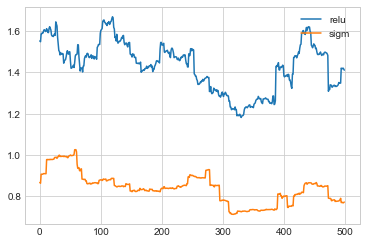

In [89]:
y_train_pred1 = nnSA1.predict(X)
y_train_accuracy1 = accuracy_score(Y, y_train_pred1)
print('Training accuracy: ', y_train_accuracy1)
y_train_pred2 = nnSA2.predict(X)
y_train_accuracy2 = accuracy_score(Y, y_train_pred2)
print('Training accuracy: ', y_train_accuracy2)

plt.plot(nnSA1.fitness_curve, label = "relu")
plt.plot(nnSA2.fitness_curve, label = "sigm")
plt.legend(loc='upper right')

print(nnSA1.loss, nnSA2.loss)

y_test_pred1 = nnSA1.predict(X_test)
y_test_accuracy1 = accuracy_score(Y_test, y_test_pred1)
print('Test accuracy with relu: ', y_test_accuracy1)
y_test_pred2 = nnSA2.predict(X_test)
y_test_accuracy2 = accuracy_score(Y_test, y_test_pred2)
print('Test accuracy with sigmoid: ', y_test_accuracy2)

print(confusion_matrix(Y_test, y_test_pred1))
print(confusion_matrix(Y_test, y_test_pred2))

In [90]:
scheduleNN = mlrose_hiive.GeomDecay(init_temp=10.0, decay=0.95, min_temp=0.1)
nnSA1 = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation = 'relu',
                                 algorithm = 'simulated_annealing', 
                                 max_iters = 500, clip_max = 5, schedule=scheduleNN,
                                 bias = True, is_classifier = True, learning_rate = 1.5,
                                 early_stopping = True, max_attempts = 7,
                                 random_state = 13, curve=True)
nnSA2 = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation = 'sigmoid',
                                 algorithm = 'simulated_annealing', schedule=scheduleNN, 
                                 max_iters = 500, clip_max = 5,
                                 bias = True, is_classifier = True, learning_rate = 1.5,
                                 early_stopping = True, max_attempts = 7,
                                 random_state = 13, curve=True)
nnSA1.fit(X, Y)
nnSA2.fit(X, Y)

NeuralNetwork(activation='sigmoid', algorithm='simulated_annealing', clip_max=5,
              curve=True, early_stopping=True, hidden_nodes=[16],
              learning_rate=1.5, max_attempts=7, max_iters=500, random_state=13,
              schedule=GeomDecay(init_temp=10.0, decay=0.95, min_temp=0.1))

Training accuracy:  0.5679611650485437
Training accuracy:  0.525242718446602
2.246821582190246 1.1246211728191182
Test accuracy with relu:  0.5790094339622641
Test accuracy with sigmoid:  0.6497641509433962
[[429 290]
 [ 67  62]]
[[497 222]
 [ 75  54]]


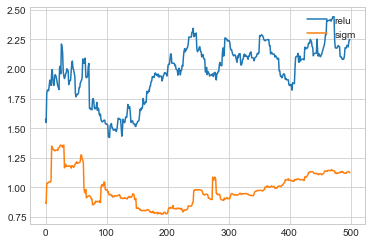

In [91]:
y_train_pred1 = nnSA1.predict(X)
y_train_accuracy1 = accuracy_score(Y, y_train_pred1)
print('Training accuracy: ', y_train_accuracy1)
y_train_pred2 = nnSA2.predict(X)
y_train_accuracy2 = accuracy_score(Y, y_train_pred2)
print('Training accuracy: ', y_train_accuracy2)

plt.plot(nnSA1.fitness_curve, label = "relu")
plt.plot(nnSA2.fitness_curve, label = "sigm")
plt.legend(loc='upper right')

print(nnSA1.loss, nnSA2.loss)

y_test_pred1 = nnSA1.predict(X_test)
y_test_accuracy1 = accuracy_score(Y_test, y_test_pred1)
print('Test accuracy with relu: ', y_test_accuracy1)
y_test_pred2 = nnSA2.predict(X_test)
y_test_accuracy2 = accuracy_score(Y_test, y_test_pred2)
print('Test accuracy with sigmoid: ', y_test_accuracy2)

print(confusion_matrix(Y_test, y_test_pred1))
print(confusion_matrix(Y_test, y_test_pred2))

In [92]:
scheduleNN = mlrose_hiive.GeomDecay(init_temp=10.0, decay=0.95, min_temp=0.1)
nnSA1 = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation = 'relu',
                                 algorithm = 'simulated_annealing', 
                                 max_iters = 500, clip_max = 5, schedule=scheduleNN,
                                 bias = True, is_classifier = True, learning_rate = 5,
                                 early_stopping = True, max_attempts = 7,
                                 random_state = 13, curve=True)
nnSA2 = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation = 'sigmoid',
                                 algorithm = 'simulated_annealing', schedule=scheduleNN, 
                                 max_iters = 500, clip_max = 5,
                                 bias = True, is_classifier = True, learning_rate = 5,
                                 early_stopping = True, max_attempts = 7,
                                 random_state = 13, curve=True)
nnSA1.fit(X, Y)
nnSA2.fit(X, Y)

NeuralNetwork(activation='sigmoid', algorithm='simulated_annealing', clip_max=5,
              curve=True, early_stopping=True, hidden_nodes=[16],
              learning_rate=5, max_attempts=7, max_iters=500, random_state=13,
              schedule=GeomDecay(init_temp=10.0, decay=0.95, min_temp=0.1))

Training accuracy:  0.6223300970873786
Training accuracy:  0.5271844660194175
5.94881700498387 1.0374234418889579
Test accuracy with relu:  0.6497641509433962
Test accuracy with sigmoid:  0.6297169811320755
[[486 233]
 [ 64  65]]
[[498 221]
 [ 93  36]]


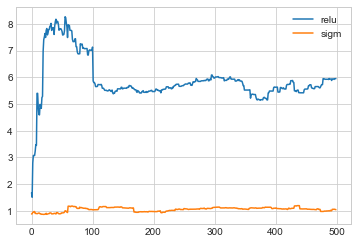

In [93]:
y_train_pred1 = nnSA1.predict(X)
y_train_accuracy1 = accuracy_score(Y, y_train_pred1)
print('Training accuracy: ', y_train_accuracy1)
y_train_pred2 = nnSA2.predict(X)
y_train_accuracy2 = accuracy_score(Y, y_train_pred2)
print('Training accuracy: ', y_train_accuracy2)

plt.plot(nnSA1.fitness_curve, label = "relu")
plt.plot(nnSA2.fitness_curve, label = "sigm")
plt.legend(loc='upper right')

print(nnSA1.loss, nnSA2.loss)

y_test_pred1 = nnSA1.predict(X_test)
y_test_accuracy1 = accuracy_score(Y_test, y_test_pred1)
print('Test accuracy with relu: ', y_test_accuracy1)
y_test_pred2 = nnSA2.predict(X_test)
y_test_accuracy2 = accuracy_score(Y_test, y_test_pred2)
print('Test accuracy with sigmoid: ', y_test_accuracy2)

print(confusion_matrix(Y_test, y_test_pred1))
print(confusion_matrix(Y_test, y_test_pred2))

In [94]:
scheduleNN = mlrose_hiive.GeomDecay(init_temp=10.0, decay=0.95, min_temp=0.1)
nnSA1 = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation = 'relu',
                                 algorithm = 'simulated_annealing', 
                                 max_iters = 500, clip_max = 5, schedule=scheduleNN,
                                 bias = True, is_classifier = True, learning_rate = 15,
                                 early_stopping = True, max_attempts = 7,
                                 random_state = 13, curve=True)
nnSA2 = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation = 'sigmoid',
                                 algorithm = 'simulated_annealing', schedule=scheduleNN, 
                                 max_iters = 500, clip_max = 5,
                                 bias = True, is_classifier = True, learning_rate = 15,
                                 early_stopping = True, max_attempts = 7,
                                 random_state = 13, curve=True)
nnSA1.fit(X, Y)
nnSA2.fit(X, Y)

Exception: step size must be less than (max_val - min_val).

In [95]:
nnSA2 = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation = 'sigmoid',
                                 algorithm = 'simulated_annealing', schedule=scheduleNN, 
                                 max_iters = 500, clip_max = 5,
                                 bias = True, is_classifier = True, learning_rate = 15,
                                 early_stopping = True, max_attempts = 7,
                                 random_state = 13, curve=True)


nnSA2.fit(X, Y)

Exception: step size must be less than (max_val - min_val).

In [96]:
scheduleNN = mlrose_hiive.GeomDecay(init_temp=10.0, decay=0.95, min_temp=0.1)
nnSA1 = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation = 'relu',
                                 algorithm = 'simulated_annealing', 
                                 max_iters = 500, clip_max = 5, schedule=scheduleNN,
                                 bias = True, is_classifier = True, learning_rate = 2,
                                 early_stopping = True, max_attempts = 7,
                                 random_state = 13, curve=True)
nnSA2 = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation = 'sigmoid',
                                 algorithm = 'simulated_annealing', schedule=scheduleNN, 
                                 max_iters = 500, clip_max = 5,
                                 bias = True, is_classifier = True, learning_rate = 2,
                                 early_stopping = True, max_attempts = 7,
                                 random_state = 13, curve=True)
nnSA1.fit(X, Y)
nnSA2.fit(X, Y)

NeuralNetwork(activation='sigmoid', algorithm='simulated_annealing', clip_max=5,
              curve=True, early_stopping=True, hidden_nodes=[16],
              learning_rate=2, max_attempts=7, max_iters=500, random_state=13,
              schedule=GeomDecay(init_temp=10.0, decay=0.95, min_temp=0.1))

Training accuracy:  0.558252427184466
Training accuracy:  0.5097087378640777
2.2841865065370066 0.9431964849587352
Test accuracy with relu:  0.5613207547169812
Test accuracy with sigmoid:  0.6191037735849056
[[404 315]
 [ 57  72]]
[[465 254]
 [ 69  60]]


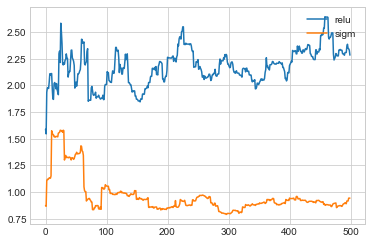

In [97]:
y_train_pred1 = nnGA1.predict(X)
y_train_accuracy1 = accuracy_score(Y, y_train_pred1)
print('Training accuracy: ', y_train_accuracy1)
y_train_pred2 = nnGA2.predict(X)
y_train_accuracy2 = accuracy_score(Y, y_train_pred2)
print('Training accuracy: ', y_train_accuracy2)

plt.plot(nnSA1.fitness_curve, label = "relu")
plt.plot(nnSA2.fitness_curve, label = "sigm")
plt.legend(loc='upper right')

print(nnSA1.loss, nnGA2.loss)

y_test_pred1 = nnGA1.predict(X_test)
y_test_accuracy1 = accuracy_score(Y_test, y_test_pred1)
print('Test accuracy with relu: ', y_test_accuracy1)
y_test_pred2 = nnGA2.predict(X_test)
y_test_accuracy2 = accuracy_score(Y_test, y_test_pred2)
print('Test accuracy with sigmoid: ', y_test_accuracy2)

print(confusion_matrix(Y_test, y_test_pred1))
print(confusion_matrix(Y_test, y_test_pred2))

In [98]:
scheduleNN = mlrose_hiive.GeomDecay(init_temp=10.0, decay=0.95, min_temp=0.1)
nnSA1 = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation = 'relu',
                                 algorithm = 'simulated_annealing', 
                                 max_iters = 500, clip_max = 5, schedule=scheduleNN,
                                 bias = True, is_classifier = True, learning_rate = 3,
                                 early_stopping = True, max_attempts = 7,
                                 random_state = 13, curve=True)
nnSA2 = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation = 'sigmoid',
                                 algorithm = 'simulated_annealing', schedule=scheduleNN, 
                                 max_iters = 500, clip_max = 5,
                                 bias = True, is_classifier = True, learning_rate = 3,
                                 early_stopping = True, max_attempts = 7,
                                 random_state = 13, curve=True)
nnSA1.fit(X, Y)
nnSA2.fit(X, Y)

NeuralNetwork(activation='sigmoid', algorithm='simulated_annealing', clip_max=5,
              curve=True, early_stopping=True, hidden_nodes=[16],
              learning_rate=3, max_attempts=7, max_iters=500, random_state=13,
              schedule=GeomDecay(init_temp=10.0, decay=0.95, min_temp=0.1))

Training accuracy:  0.5922330097087378
Training accuracy:  0.5563106796116505
3.102640960823731 1.198041936312823
Test accuracy with relu:  0.5483490566037735
Test accuracy with sigmoid:  0.6709905660377359
[[399 320]
 [ 63  66]]
[[524 195]
 [ 84  45]]


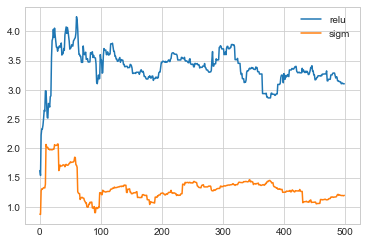

In [99]:
y_train_pred1 = nnSA1.predict(X)
y_train_accuracy1 = accuracy_score(Y, y_train_pred1)
print('Training accuracy: ', y_train_accuracy1)
y_train_pred2 = nnSA2.predict(X)
y_train_accuracy2 = accuracy_score(Y, y_train_pred2)
print('Training accuracy: ', y_train_accuracy2)

plt.plot(nnSA1.fitness_curve, label = "relu")
plt.plot(nnSA2.fitness_curve, label = "sigm")
plt.legend(loc='upper right')

print(nnSA1.loss, nnSA2.loss)

y_test_pred1 = nnSA1.predict(X_test)
y_test_accuracy1 = accuracy_score(Y_test, y_test_pred1)
print('Test accuracy with relu: ', y_test_accuracy1)
y_test_pred2 = nnSA2.predict(X_test)
y_test_accuracy2 = accuracy_score(Y_test, y_test_pred2)
print('Test accuracy with sigmoid: ', y_test_accuracy2)

print(confusion_matrix(Y_test, y_test_pred1))
print(confusion_matrix(Y_test, y_test_pred2))

In [100]:
scheduleNN = mlrose_hiive.GeomDecay(init_temp=10.0, decay=0.95, min_temp=0.1)
nnSA1 = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation = 'relu',
                                 algorithm = 'simulated_annealing', 
                                 max_iters = 500, clip_max = 5, schedule=scheduleNN,
                                 bias = True, is_classifier = True, learning_rate = 4,
                                 early_stopping = True, max_attempts = 7,
                                 random_state = 13, curve=True)
nnSA2 = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation = 'sigmoid',
                                 algorithm = 'simulated_annealing', schedule=scheduleNN, 
                                 max_iters = 500, clip_max = 5,
                                 bias = True, is_classifier = True, learning_rate = 4,
                                 early_stopping = True, max_attempts = 7,
                                 random_state = 13, curve=True)
nnSA1.fit(X, Y)
nnSA2.fit(X, Y)

NeuralNetwork(activation='sigmoid', algorithm='simulated_annealing', clip_max=5,
              curve=True, early_stopping=True, hidden_nodes=[16],
              learning_rate=4, max_attempts=7, max_iters=500, random_state=13,
              schedule=GeomDecay(init_temp=10.0, decay=0.95, min_temp=0.1))

Training accuracy:  0.6184466019417476
Training accuracy:  0.6145631067961165
3.4393968092806353 1.4395060681952356
Test accuracy with relu:  0.4846698113207547
Test accuracy with sigmoid:  0.6014150943396226
[[327 392]
 [ 45  84]]
[[427 292]
 [ 46  83]]


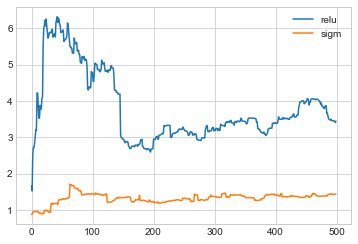

In [101]:
y_train_pred1 = nnSA1.predict(X)
y_train_accuracy1 = accuracy_score(Y, y_train_pred1)
print('Training accuracy: ', y_train_accuracy1)
y_train_pred2 = nnSA2.predict(X)
y_train_accuracy2 = accuracy_score(Y, y_train_pred2)
print('Training accuracy: ', y_train_accuracy2)

plt.plot(nnSA1.fitness_curve, label = "relu")
plt.plot(nnSA2.fitness_curve, label = "sigm")
plt.legend(loc='upper right')

print(nnSA1.loss, nnSA2.loss)

y_test_pred1 = nnSA1.predict(X_test)
y_test_accuracy1 = accuracy_score(Y_test, y_test_pred1)
print('Test accuracy with relu: ', y_test_accuracy1)
y_test_pred2 = nnSA2.predict(X_test)
y_test_accuracy2 = accuracy_score(Y_test, y_test_pred2)
print('Test accuracy with sigmoid: ', y_test_accuracy2)

print(confusion_matrix(Y_test, y_test_pred1))
print(confusion_matrix(Y_test, y_test_pred2))

In [111]:
nnGA1 = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation = 'relu',
                                 algorithm = 'genetic_alg', mutation_prob = 0.2,
                                 max_iters = 500, clip_max = 5, pop_size=200, 
                                 bias = True, is_classifier = True, learning_rate = 0.2,
                                 early_stopping = True, max_attempts = 7,
                                 random_state = 13, curve=True)
nnGA2 = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation = 'sigmoid',
                                 algorithm = 'genetic_alg', mutation_prob = 0.2,                                   
                                 max_iters = 500, clip_max = 5, pop_size=200,
                                 bias = True, is_classifier = True, learning_rate = 0.2,
                                 early_stopping = True, max_attempts = 7,
                                 random_state = 13, curve=True)
nnGA1.fit(X, Y)
nnGA2.fit(X, Y)

NeuralNetwork(activation='sigmoid', algorithm='genetic_alg', clip_max=5,
              curve=True, early_stopping=True, hidden_nodes=[16],
              learning_rate=0.2, max_attempts=7, max_iters=500,
              mutation_prob=0.2, random_state=13)

Training accuracy:  0.6330097087378641
Training accuracy:  0.5640776699029126
3.4393968092806353 1.0151083070816944
Test accuracy with relu:  0.5023584905660378
Test accuracy with sigmoid:  0.43042452830188677
[[337 382]
 [ 40  89]]
[[289 430]
 [ 53  76]]


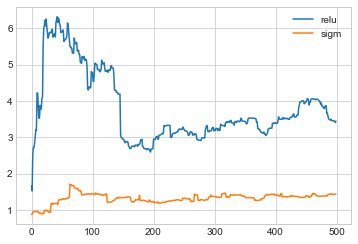

In [113]:
y_train_pred1 = nnGA1.predict(X)
y_train_accuracy1 = accuracy_score(Y, y_train_pred1)
print('Training accuracy: ', y_train_accuracy1)
y_train_pred2 = nnGA2.predict(X)
y_train_accuracy2 = accuracy_score(Y, y_train_pred2)
print('Training accuracy: ', y_train_accuracy2)

plt.plot(nnSA1.fitness_curve, label = "relu")
plt.plot(nnSA2.fitness_curve, label = "sigm")
plt.legend(loc='upper right')

print(nnSA1.loss, nnGA2.loss)

y_test_pred1 = nnGA1.predict(X_test)
y_test_accuracy1 = accuracy_score(Y_test, y_test_pred1)
print('Test accuracy with relu: ', y_test_accuracy1)
y_test_pred2 = nnGA2.predict(X_test)
y_test_accuracy2 = accuracy_score(Y_test, y_test_pred2)
print('Test accuracy with sigmoid: ', y_test_accuracy2)

print(confusion_matrix(Y_test, y_test_pred1))
print(confusion_matrix(Y_test, y_test_pred2))

In [114]:
# let's tune pop_size:
nnGA1 = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation = 'relu',
                                 algorithm = 'genetic_alg', mutation_prob = 0.2,
                                 max_iters = 500, clip_max = 5, pop_size=100, 
                                 bias = True, is_classifier = True, learning_rate = 0.2,
                                 early_stopping = True, max_attempts = 7,
                                 random_state = 13, curve=True)
nnGA2 = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation = 'sigmoid',
                                 algorithm = 'genetic_alg', mutation_prob = 0.2,                                   
                                 max_iters = 500, clip_max = 5, pop_size=100,
                                 bias = True, is_classifier = True, learning_rate = 0.2,
                                 early_stopping = True, max_attempts = 7,
                                 random_state = 13, curve=True)
nnGA1.fit(X, Y)
nnGA2.fit(X, Y)

NeuralNetwork(activation='sigmoid', algorithm='genetic_alg', clip_max=5,
              curve=True, early_stopping=True, hidden_nodes=[16],
              learning_rate=0.2, max_attempts=7, max_iters=500,
              mutation_prob=0.2, pop_size=100, random_state=13)

Training accuracy:  0.566990291262136
Training accuracy:  0.5786407766990291
3.4393968092806353 1.2366961004108974
Test accuracy with relu:  0.5389150943396226
Test accuracy with sigmoid:  0.5341981132075472
[[393 326]
 [ 65  64]]
[[364 355]
 [ 40  89]]


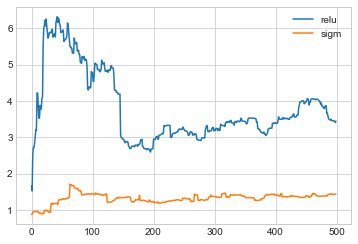

In [115]:
y_train_pred1 = nnGA1.predict(X)
y_train_accuracy1 = accuracy_score(Y, y_train_pred1)
print('Training accuracy: ', y_train_accuracy1)
y_train_pred2 = nnGA2.predict(X)
y_train_accuracy2 = accuracy_score(Y, y_train_pred2)
print('Training accuracy: ', y_train_accuracy2)

plt.plot(nnSA1.fitness_curve, label = "relu")
plt.plot(nnSA2.fitness_curve, label = "sigm")
plt.legend(loc='upper right')

print(nnSA1.loss, nnGA2.loss)

y_test_pred1 = nnGA1.predict(X_test)
y_test_accuracy1 = accuracy_score(Y_test, y_test_pred1)
print('Test accuracy with relu: ', y_test_accuracy1)
y_test_pred2 = nnGA2.predict(X_test)
y_test_accuracy2 = accuracy_score(Y_test, y_test_pred2)
print('Test accuracy with sigmoid: ', y_test_accuracy2)

print(confusion_matrix(Y_test, y_test_pred1))
print(confusion_matrix(Y_test, y_test_pred2))

In [116]:
# let's tune pop_size:
nnGA1 = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation = 'relu',
                                 algorithm = 'genetic_alg', mutation_prob = 0.2,
                                 max_iters = 500, clip_max = 5, pop_size=50, 
                                 bias = True, is_classifier = True, learning_rate = 0.2,
                                 early_stopping = True, max_attempts = 7,
                                 random_state = 13, curve=True)
nnGA2 = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation = 'sigmoid',
                                 algorithm = 'genetic_alg', mutation_prob = 0.2,                                   
                                 max_iters = 500, clip_max = 5, pop_size=50,
                                 bias = True, is_classifier = True, learning_rate = 0.2,
                                 early_stopping = True, max_attempts = 7,
                                 random_state = 13, curve=True)
nnGA1.fit(X, Y)
nnGA2.fit(X, Y)

NeuralNetwork(activation='sigmoid', algorithm='genetic_alg', clip_max=5,
              curve=True, early_stopping=True, hidden_nodes=[16],
              learning_rate=0.2, max_attempts=7, max_iters=500,
              mutation_prob=0.2, pop_size=50, random_state=13)

Training accuracy:  0.6116504854368932
Training accuracy:  0.5660194174757281
3.4393968092806353 1.3631230952464963
Test accuracy with relu:  0.5400943396226415
Test accuracy with sigmoid:  0.5176886792452831
[[371 348]
 [ 42  87]]
[[356 363]
 [ 46  83]]


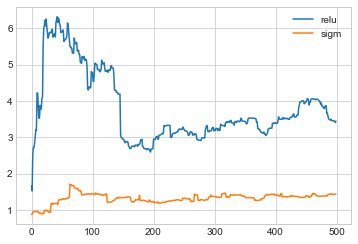

In [117]:
y_train_pred1 = nnGA1.predict(X)
y_train_accuracy1 = accuracy_score(Y, y_train_pred1)
print('Training accuracy: ', y_train_accuracy1)
y_train_pred2 = nnGA2.predict(X)
y_train_accuracy2 = accuracy_score(Y, y_train_pred2)
print('Training accuracy: ', y_train_accuracy2)

plt.plot(nnSA1.fitness_curve, label = "relu")
plt.plot(nnSA2.fitness_curve, label = "sigm")
plt.legend(loc='upper right')

print(nnSA1.loss, nnGA2.loss)

y_test_pred1 = nnGA1.predict(X_test)
y_test_accuracy1 = accuracy_score(Y_test, y_test_pred1)
print('Test accuracy with relu: ', y_test_accuracy1)
y_test_pred2 = nnGA2.predict(X_test)
y_test_accuracy2 = accuracy_score(Y_test, y_test_pred2)
print('Test accuracy with sigmoid: ', y_test_accuracy2)

print(confusion_matrix(Y_test, y_test_pred1))
print(confusion_matrix(Y_test, y_test_pred2))

In [118]:
# let's tune pop_size:
nnGA1 = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation = 'relu',
                                 algorithm = 'genetic_alg', mutation_prob = 0.2,
                                 max_iters = 500, clip_max = 5, pop_size=25, 
                                 bias = True, is_classifier = True, learning_rate = 0.2,
                                 early_stopping = True, max_attempts = 7,
                                 random_state = 13, curve=True)
nnGA2 = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation = 'sigmoid',
                                 algorithm = 'genetic_alg', mutation_prob = 0.2,                                   
                                 max_iters = 500, clip_max = 5, pop_size=25,
                                 bias = True, is_classifier = True, learning_rate = 0.2,
                                 early_stopping = True, max_attempts = 7,
                                 random_state = 13, curve=True)
nnGA1.fit(X, Y)
nnGA2.fit(X, Y)

NeuralNetwork(activation='sigmoid', algorithm='genetic_alg', clip_max=5,
              curve=True, early_stopping=True, hidden_nodes=[16],
              learning_rate=0.2, max_attempts=7, max_iters=500,
              mutation_prob=0.2, pop_size=25, random_state=13)

Training accuracy:  0.612621359223301
Training accuracy:  0.5990291262135923
3.4393968092806353 1.3713401462706245
Test accuracy with relu:  0.5400943396226415
Test accuracy with sigmoid:  0.5554245283018868
[[366 353]
 [ 37  92]]
[[393 326]
 [ 51  78]]


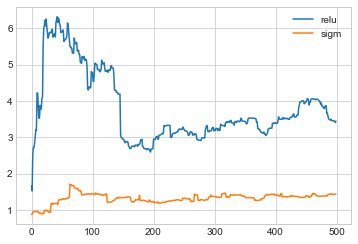

In [119]:
y_train_pred1 = nnGA1.predict(X)
y_train_accuracy1 = accuracy_score(Y, y_train_pred1)
print('Training accuracy: ', y_train_accuracy1)
y_train_pred2 = nnGA2.predict(X)
y_train_accuracy2 = accuracy_score(Y, y_train_pred2)
print('Training accuracy: ', y_train_accuracy2)

plt.plot(nnSA1.fitness_curve, label = "relu")
plt.plot(nnSA2.fitness_curve, label = "sigm")
plt.legend(loc='upper right')

print(nnSA1.loss, nnGA2.loss)

y_test_pred1 = nnGA1.predict(X_test)
y_test_accuracy1 = accuracy_score(Y_test, y_test_pred1)
print('Test accuracy with relu: ', y_test_accuracy1)
y_test_pred2 = nnGA2.predict(X_test)
y_test_accuracy2 = accuracy_score(Y_test, y_test_pred2)
print('Test accuracy with sigmoid: ', y_test_accuracy2)

print(confusion_matrix(Y_test, y_test_pred1))
print(confusion_matrix(Y_test, y_test_pred2))

In [120]:
# let's tune pop_size:
nnGA1 = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation = 'relu',
                                 algorithm = 'genetic_alg', mutation_prob = 0.2,
                                 max_iters = 500, clip_max = 5, pop_size=25, 
                                 bias = True, is_classifier = True, learning_rate = 0.2,
                                 early_stopping = True, max_attempts = 7,
                                 random_state = 13, curve=True)
nnGA2 = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation = 'sigmoid',
                                 algorithm = 'genetic_alg', mutation_prob = 0.2,                                   
                                 max_iters = 500, clip_max = 5, pop_size=25,
                                 bias = True, is_classifier = True, learning_rate = 0.2,
                                 early_stopping = True, max_attempts = 7,
                                 random_state = 13, curve=True)
nnGA1.fit(X, Y)
nnGA2.fit(X, Y)

NeuralNetwork(activation='sigmoid', algorithm='genetic_alg', clip_max=5,
              curve=True, early_stopping=True, hidden_nodes=[16],
              learning_rate=0.2, max_attempts=7, max_iters=500,
              mutation_prob=0.2, pop_size=25, random_state=13)

Training accuracy:  0.612621359223301
Training accuracy:  0.5990291262135923
3.4393968092806353 1.3713401462706245
Test accuracy with relu:  0.5400943396226415
Test accuracy with sigmoid:  0.5554245283018868
[[366 353]
 [ 37  92]]
[[393 326]
 [ 51  78]]


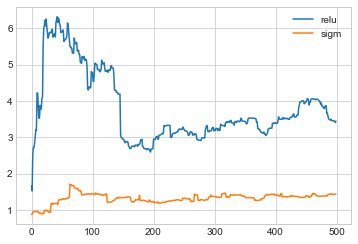

In [121]:
y_train_pred1 = nnGA1.predict(X)
y_train_accuracy1 = accuracy_score(Y, y_train_pred1)
print('Training accuracy: ', y_train_accuracy1)
y_train_pred2 = nnGA2.predict(X)
y_train_accuracy2 = accuracy_score(Y, y_train_pred2)
print('Training accuracy: ', y_train_accuracy2)

plt.plot(nnSA1.fitness_curve, label = "relu")
plt.plot(nnSA2.fitness_curve, label = "sigm")
plt.legend(loc='upper right')

print(nnSA1.loss, nnGA2.loss)

y_test_pred1 = nnGA1.predict(X_test)
y_test_accuracy1 = accuracy_score(Y_test, y_test_pred1)
print('Test accuracy with relu: ', y_test_accuracy1)
y_test_pred2 = nnGA2.predict(X_test)
y_test_accuracy2 = accuracy_score(Y_test, y_test_pred2)
print('Test accuracy with sigmoid: ', y_test_accuracy2)

print(confusion_matrix(Y_test, y_test_pred1))
print(confusion_matrix(Y_test, y_test_pred2))

This seems best:

In [122]:
nnGA1 = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation = 'relu',
                                 algorithm = 'genetic_alg', mutation_prob = 0.2,
                                 max_iters = 500, clip_max = 5, pop_size=50, 
                                 bias = True, is_classifier = True, learning_rate = 0.2,
                                 early_stopping = True, max_attempts = 7,
                                 random_state = 13, curve=True)
nnGA2 = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation = 'sigmoid',
                                 algorithm = 'genetic_alg', mutation_prob = 0.2,                                   
                                 max_iters = 500, clip_max = 5, pop_size=50,
                                 bias = True, is_classifier = True, learning_rate = 0.2,
                                 early_stopping = True, max_attempts = 7,
                                 random_state = 13, curve=True)
nnGA1.fit(X, Y)
nnGA2.fit(X, Y)

NeuralNetwork(activation='sigmoid', algorithm='genetic_alg', clip_max=5,
              curve=True, early_stopping=True, hidden_nodes=[16],
              learning_rate=0.2, max_attempts=7, max_iters=500,
              mutation_prob=0.2, pop_size=50, random_state=13)

Training accuracy:  0.6116504854368932
Training accuracy:  0.5660194174757281
3.4393968092806353 1.3631230952464963
Test accuracy with relu:  0.5400943396226415
Test accuracy with sigmoid:  0.5176886792452831
[[371 348]
 [ 42  87]]
[[356 363]
 [ 46  83]]


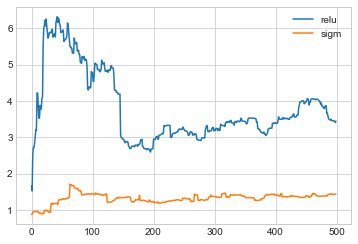

In [123]:
y_train_pred1 = nnGA1.predict(X)
y_train_accuracy1 = accuracy_score(Y, y_train_pred1)
print('Training accuracy: ', y_train_accuracy1)
y_train_pred2 = nnGA2.predict(X)
y_train_accuracy2 = accuracy_score(Y, y_train_pred2)
print('Training accuracy: ', y_train_accuracy2)

plt.plot(nnSA1.fitness_curve, label = "relu")
plt.plot(nnSA2.fitness_curve, label = "sigm")
plt.legend(loc='upper right')

print(nnSA1.loss, nnGA2.loss)

y_test_pred1 = nnGA1.predict(X_test)
y_test_accuracy1 = accuracy_score(Y_test, y_test_pred1)
print('Test accuracy with relu: ', y_test_accuracy1)
y_test_pred2 = nnGA2.predict(X_test)
y_test_accuracy2 = accuracy_score(Y_test, y_test_pred2)
print('Test accuracy with sigmoid: ', y_test_accuracy2)

print(confusion_matrix(Y_test, y_test_pred1))
print(confusion_matrix(Y_test, y_test_pred2))

In [124]:
# now let's tune mutation_prob
nnGA1 = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation = 'relu',
                                 algorithm = 'genetic_alg', mutation_prob = 0.1,
                                 max_iters = 500, clip_max = 5, pop_size=50, 
                                 bias = True, is_classifier = True, learning_rate = 0.2,
                                 early_stopping = True, max_attempts = 7,
                                 random_state = 13, curve=True)
nnGA2 = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation = 'sigmoid',
                                 algorithm = 'genetic_alg', mutation_prob = 0.1,                                   
                                 max_iters = 500, clip_max = 5, pop_size=50,
                                 bias = True, is_classifier = True, learning_rate = 0.2,
                                 early_stopping = True, max_attempts = 7,
                                 random_state = 13, curve=True)
nnGA1.fit(X, Y)
nnGA2.fit(X, Y)

NeuralNetwork(activation='sigmoid', algorithm='genetic_alg', clip_max=5,
              curve=True, early_stopping=True, hidden_nodes=[16],
              learning_rate=0.2, max_attempts=7, max_iters=500, pop_size=50,
              random_state=13)

Training accuracy:  0.5893203883495146
Training accuracy:  0.5941747572815534
3.4393968092806353 0.9269263958042377
Test accuracy with relu:  0.6002358490566038
Test accuracy with sigmoid:  0.5625
[[439 280]
 [ 59  70]]
[[396 323]
 [ 48  81]]


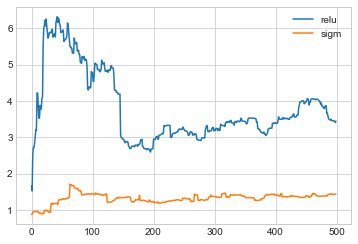

In [125]:
y_train_pred1 = nnGA1.predict(X)
y_train_accuracy1 = accuracy_score(Y, y_train_pred1)
print('Training accuracy: ', y_train_accuracy1)
y_train_pred2 = nnGA2.predict(X)
y_train_accuracy2 = accuracy_score(Y, y_train_pred2)
print('Training accuracy: ', y_train_accuracy2)

plt.plot(nnSA1.fitness_curve, label = "relu")
plt.plot(nnSA2.fitness_curve, label = "sigm")
plt.legend(loc='upper right')

print(nnSA1.loss, nnGA2.loss)

y_test_pred1 = nnGA1.predict(X_test)
y_test_accuracy1 = accuracy_score(Y_test, y_test_pred1)
print('Test accuracy with relu: ', y_test_accuracy1)
y_test_pred2 = nnGA2.predict(X_test)
y_test_accuracy2 = accuracy_score(Y_test, y_test_pred2)
print('Test accuracy with sigmoid: ', y_test_accuracy2)

print(confusion_matrix(Y_test, y_test_pred1))
print(confusion_matrix(Y_test, y_test_pred2))

In [126]:
# now let's tune mutation_prob
nnGA1 = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation = 'relu',
                                 algorithm = 'genetic_alg', mutation_prob = 0.05,
                                 max_iters = 500, clip_max = 5, pop_size=50, 
                                 bias = True, is_classifier = True, learning_rate = 0.2,
                                 early_stopping = True, max_attempts = 7,
                                 random_state = 13, curve=True)
nnGA2 = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation = 'sigmoid',
                                 algorithm = 'genetic_alg', mutation_prob = 0.05,                                   
                                 max_iters = 500, clip_max = 5, pop_size=50,
                                 bias = True, is_classifier = True, learning_rate = 0.2,
                                 early_stopping = True, max_attempts = 7,
                                 random_state = 13, curve=True)
nnGA1.fit(X, Y)
nnGA2.fit(X, Y)

NeuralNetwork(activation='sigmoid', algorithm='genetic_alg', clip_max=5,
              curve=True, early_stopping=True, hidden_nodes=[16],
              learning_rate=0.2, max_attempts=7, max_iters=500,
              mutation_prob=0.05, pop_size=50, random_state=13)

Training accuracy:  0.6
Training accuracy:  0.6320388349514563
3.4393968092806353 0.9440651437348532
Test accuracy with relu:  0.535377358490566
Test accuracy with sigmoid:  0.5247641509433962
[[369 350]
 [ 44  85]]
[[349 370]
 [ 33  96]]


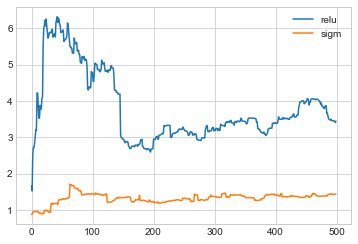

In [127]:
y_train_pred1 = nnGA1.predict(X)
y_train_accuracy1 = accuracy_score(Y, y_train_pred1)
print('Training accuracy: ', y_train_accuracy1)
y_train_pred2 = nnGA2.predict(X)
y_train_accuracy2 = accuracy_score(Y, y_train_pred2)
print('Training accuracy: ', y_train_accuracy2)

plt.plot(nnSA1.fitness_curve, label = "relu")
plt.plot(nnSA2.fitness_curve, label = "sigm")
plt.legend(loc='upper right')

print(nnSA1.loss, nnGA2.loss)

y_test_pred1 = nnGA1.predict(X_test)
y_test_accuracy1 = accuracy_score(Y_test, y_test_pred1)
print('Test accuracy with relu: ', y_test_accuracy1)
y_test_pred2 = nnGA2.predict(X_test)
y_test_accuracy2 = accuracy_score(Y_test, y_test_pred2)
print('Test accuracy with sigmoid: ', y_test_accuracy2)

print(confusion_matrix(Y_test, y_test_pred1))
print(confusion_matrix(Y_test, y_test_pred2))

In [128]:
# now let's tune mutation_prob
nnGA1 = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation = 'relu',
                                 algorithm = 'genetic_alg', mutation_prob = 0.02,
                                 max_iters = 500, clip_max = 5, pop_size=50, 
                                 bias = True, is_classifier = True, learning_rate = 0.2,
                                 early_stopping = True, max_attempts = 7,
                                 random_state = 13, curve=True)
nnGA2 = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation = 'sigmoid',
                                 algorithm = 'genetic_alg', mutation_prob = 0.02,                                   
                                 max_iters = 500, clip_max = 5, pop_size=50,
                                 bias = True, is_classifier = True, learning_rate = 0.2,
                                 early_stopping = True, max_attempts = 7,
                                 random_state = 13, curve=True)
nnGA1.fit(X, Y)
nnGA2.fit(X, Y)

NeuralNetwork(activation='sigmoid', algorithm='genetic_alg', clip_max=5,
              curve=True, early_stopping=True, hidden_nodes=[16],
              learning_rate=0.2, max_attempts=7, max_iters=500,
              mutation_prob=0.02, pop_size=50, random_state=13)

Training accuracy:  0.5951456310679611
Training accuracy:  0.629126213592233
3.4393968092806353 0.8213250037766167
Test accuracy with relu:  0.4964622641509434
Test accuracy with sigmoid:  0.6002358490566038
[[343 376]
 [ 51  78]]
[[435 284]
 [ 55  74]]


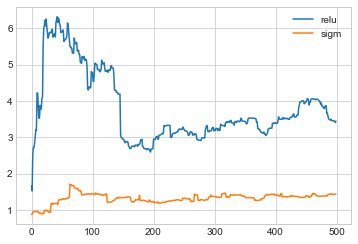

In [129]:
y_train_pred1 = nnGA1.predict(X)
y_train_accuracy1 = accuracy_score(Y, y_train_pred1)
print('Training accuracy: ', y_train_accuracy1)
y_train_pred2 = nnGA2.predict(X)
y_train_accuracy2 = accuracy_score(Y, y_train_pred2)
print('Training accuracy: ', y_train_accuracy2)

plt.plot(nnSA1.fitness_curve, label = "relu")
plt.plot(nnSA2.fitness_curve, label = "sigm")
plt.legend(loc='upper right')

print(nnSA1.loss, nnGA2.loss)

y_test_pred1 = nnGA1.predict(X_test)
y_test_accuracy1 = accuracy_score(Y_test, y_test_pred1)
print('Test accuracy with relu: ', y_test_accuracy1)
y_test_pred2 = nnGA2.predict(X_test)
y_test_accuracy2 = accuracy_score(Y_test, y_test_pred2)
print('Test accuracy with sigmoid: ', y_test_accuracy2)

print(confusion_matrix(Y_test, y_test_pred1))
print(confusion_matrix(Y_test, y_test_pred2))

In [130]:
# now let's tune mutation_prob
nnGA1 = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation = 'relu',
                                 algorithm = 'genetic_alg', mutation_prob = 0.01,
                                 max_iters = 500, clip_max = 5, pop_size=50, 
                                 bias = True, is_classifier = True, learning_rate = 0.2,
                                 early_stopping = True, max_attempts = 7,
                                 random_state = 13, curve=True)
nnGA2 = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation = 'sigmoid',
                                 algorithm = 'genetic_alg', mutation_prob = 0.01,                                   
                                 max_iters = 500, clip_max = 5, pop_size=50,
                                 bias = True, is_classifier = True, learning_rate = 0.2,
                                 early_stopping = True, max_attempts = 7,
                                 random_state = 13, curve=True)
nnGA1.fit(X, Y)
nnGA2.fit(X, Y)

NeuralNetwork(activation='sigmoid', algorithm='genetic_alg', clip_max=5,
              curve=True, early_stopping=True, hidden_nodes=[16],
              learning_rate=0.2, max_attempts=7, max_iters=500,
              mutation_prob=0.01, pop_size=50, random_state=13)

Training accuracy:  0.6359223300970874
Training accuracy:  0.6621359223300971
3.4393968092806353 0.831385856510997
Test accuracy with relu:  0.5601415094339622
Test accuracy with sigmoid:  0.5683962264150944
[[396 323]
 [ 50  79]]
[[409 310]
 [ 56  73]]


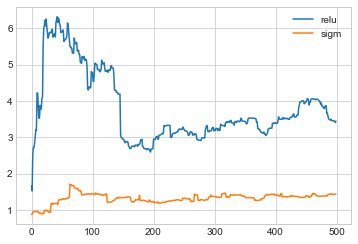

In [131]:
y_train_pred1 = nnGA1.predict(X)
y_train_accuracy1 = accuracy_score(Y, y_train_pred1)
print('Training accuracy: ', y_train_accuracy1)
y_train_pred2 = nnGA2.predict(X)
y_train_accuracy2 = accuracy_score(Y, y_train_pred2)
print('Training accuracy: ', y_train_accuracy2)

plt.plot(nnSA1.fitness_curve, label = "relu")
plt.plot(nnSA2.fitness_curve, label = "sigm")
plt.legend(loc='upper right')

print(nnSA1.loss, nnGA2.loss)

y_test_pred1 = nnGA1.predict(X_test)
y_test_accuracy1 = accuracy_score(Y_test, y_test_pred1)
print('Test accuracy with relu: ', y_test_accuracy1)
y_test_pred2 = nnGA2.predict(X_test)
y_test_accuracy2 = accuracy_score(Y_test, y_test_pred2)
print('Test accuracy with sigmoid: ', y_test_accuracy2)

print(confusion_matrix(Y_test, y_test_pred1))
print(confusion_matrix(Y_test, y_test_pred2))

This looks best so far:

In [132]:
# now let's tune mutation_prob
nnGA1 = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation = 'relu',
                                 algorithm = 'genetic_alg', mutation_prob = 0.05,
                                 max_iters = 500, clip_max = 5, pop_size=50, 
                                 bias = True, is_classifier = True, learning_rate = 0.2,
                                 early_stopping = True, max_attempts = 7,
                                 random_state = 13, curve=True)
nnGA2 = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation = 'sigmoid',
                                 algorithm = 'genetic_alg', mutation_prob = 0.05,                                   
                                 max_iters = 500, clip_max = 5, pop_size=50,
                                 bias = True, is_classifier = True, learning_rate = 0.2,
                                 early_stopping = True, max_attempts = 7,
                                 random_state = 13, curve=True)
nnGA1.fit(X, Y)
nnGA2.fit(X, Y)

NeuralNetwork(activation='sigmoid', algorithm='genetic_alg', clip_max=5,
              curve=True, early_stopping=True, hidden_nodes=[16],
              learning_rate=0.2, max_attempts=7, max_iters=500,
              mutation_prob=0.05, pop_size=50, random_state=13)

Training accuracy:  0.6
Training accuracy:  0.6320388349514563
3.4393968092806353 0.9440651437348532
Test accuracy with relu:  0.535377358490566
Test accuracy with sigmoid:  0.5247641509433962
[[369 350]
 [ 44  85]]
[[349 370]
 [ 33  96]]


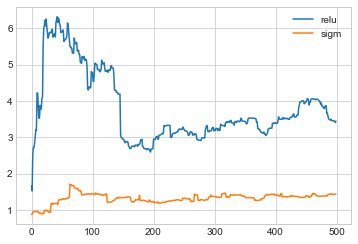

In [133]:
y_train_pred1 = nnGA1.predict(X)
y_train_accuracy1 = accuracy_score(Y, y_train_pred1)
print('Training accuracy: ', y_train_accuracy1)
y_train_pred2 = nnGA2.predict(X)
y_train_accuracy2 = accuracy_score(Y, y_train_pred2)
print('Training accuracy: ', y_train_accuracy2)

plt.plot(nnSA1.fitness_curve, label = "relu")
plt.plot(nnSA2.fitness_curve, label = "sigm")
plt.legend(loc='upper right')

print(nnSA1.loss, nnGA2.loss)

y_test_pred1 = nnGA1.predict(X_test)
y_test_accuracy1 = accuracy_score(Y_test, y_test_pred1)
print('Test accuracy with relu: ', y_test_accuracy1)
y_test_pred2 = nnGA2.predict(X_test)
y_test_accuracy2 = accuracy_score(Y_test, y_test_pred2)
print('Test accuracy with sigmoid: ', y_test_accuracy2)

print(confusion_matrix(Y_test, y_test_pred1))
print(confusion_matrix(Y_test, y_test_pred2))

In [134]:
# now let's tune l.r.:
# now let's tune mutation_prob
nnGA1 = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation = 'relu',
                                 algorithm = 'genetic_alg', mutation_prob = 0.05,
                                 max_iters = 500, clip_max = 5, pop_size=50, 
                                 bias = True, is_classifier = True, learning_rate = 0.5,
                                 early_stopping = True, max_attempts = 7,
                                 random_state = 13, curve=True)
nnGA2 = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation = 'sigmoid',
                                 algorithm = 'genetic_alg', mutation_prob = 0.05,                                   
                                 max_iters = 500, clip_max = 5, pop_size=50,
                                 bias = True, is_classifier = True, learning_rate = 0.5,
                                 early_stopping = True, max_attempts = 7,
                                 random_state = 13, curve=True)
nnGA1.fit(X, Y)
nnGA2.fit(X, Y)

NeuralNetwork(activation='sigmoid', algorithm='genetic_alg', clip_max=5,
              curve=True, early_stopping=True, hidden_nodes=[16],
              learning_rate=0.5, max_attempts=7, max_iters=500,
              mutation_prob=0.05, pop_size=50, random_state=13)

Training accuracy:  0.6
Training accuracy:  0.6320388349514563
3.4393968092806353 0.9440651437348532
Test accuracy with relu:  0.535377358490566
Test accuracy with sigmoid:  0.5247641509433962
[[369 350]
 [ 44  85]]
[[349 370]
 [ 33  96]]


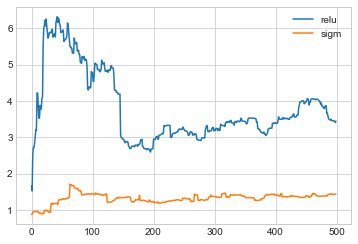

In [135]:
y_train_pred1 = nnGA1.predict(X)
y_train_accuracy1 = accuracy_score(Y, y_train_pred1)
print('Training accuracy: ', y_train_accuracy1)
y_train_pred2 = nnGA2.predict(X)
y_train_accuracy2 = accuracy_score(Y, y_train_pred2)
print('Training accuracy: ', y_train_accuracy2)

plt.plot(nnSA1.fitness_curve, label = "relu")
plt.plot(nnSA2.fitness_curve, label = "sigm")
plt.legend(loc='upper right')

print(nnSA1.loss, nnGA2.loss)

y_test_pred1 = nnGA1.predict(X_test)
y_test_accuracy1 = accuracy_score(Y_test, y_test_pred1)
print('Test accuracy with relu: ', y_test_accuracy1)
y_test_pred2 = nnGA2.predict(X_test)
y_test_accuracy2 = accuracy_score(Y_test, y_test_pred2)
print('Test accuracy with sigmoid: ', y_test_accuracy2)

print(confusion_matrix(Y_test, y_test_pred1))
print(confusion_matrix(Y_test, y_test_pred2))

In [136]:
# now let's tune l.r.:
nnGA1 = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation = 'relu',
                                 algorithm = 'genetic_alg', mutation_prob = 0.05,
                                 max_iters = 500, clip_max = 5, pop_size=50, 
                                 bias = True, is_classifier = True, learning_rate = 1.0,
                                 early_stopping = True, max_attempts = 7,
                                 random_state = 13, curve=True)
nnGA2 = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation = 'sigmoid',
                                 algorithm = 'genetic_alg', mutation_prob = 0.05,                                   
                                 max_iters = 500, clip_max = 5, pop_size=50,
                                 bias = True, is_classifier = True, learning_rate = 1.0,
                                 early_stopping = True, max_attempts = 7,
                                 random_state = 13, curve=True)
nnGA1.fit(X, Y)
nnGA2.fit(X, Y)

NeuralNetwork(activation='sigmoid', algorithm='genetic_alg', clip_max=5,
              curve=True, early_stopping=True, hidden_nodes=[16],
              learning_rate=1.0, max_attempts=7, max_iters=500,
              mutation_prob=0.05, pop_size=50, random_state=13)

Training accuracy:  0.6
Training accuracy:  0.6320388349514563
3.4393968092806353 0.9440651437348532
Test accuracy with relu:  0.535377358490566
Test accuracy with sigmoid:  0.5247641509433962
[[369 350]
 [ 44  85]]
[[349 370]
 [ 33  96]]


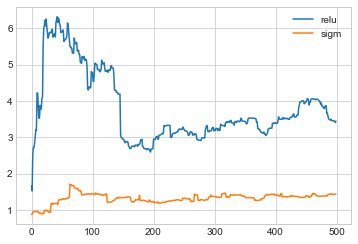

In [137]:
y_train_pred1 = nnGA1.predict(X)
y_train_accuracy1 = accuracy_score(Y, y_train_pred1)
print('Training accuracy: ', y_train_accuracy1)
y_train_pred2 = nnGA2.predict(X)
y_train_accuracy2 = accuracy_score(Y, y_train_pred2)
print('Training accuracy: ', y_train_accuracy2)

plt.plot(nnSA1.fitness_curve, label = "relu")
plt.plot(nnSA2.fitness_curve, label = "sigm")
plt.legend(loc='upper right')

print(nnSA1.loss, nnGA2.loss)

y_test_pred1 = nnGA1.predict(X_test)
y_test_accuracy1 = accuracy_score(Y_test, y_test_pred1)
print('Test accuracy with relu: ', y_test_accuracy1)
y_test_pred2 = nnGA2.predict(X_test)
y_test_accuracy2 = accuracy_score(Y_test, y_test_pred2)
print('Test accuracy with sigmoid: ', y_test_accuracy2)

print(confusion_matrix(Y_test, y_test_pred1))
print(confusion_matrix(Y_test, y_test_pred2))

In [138]:
# now let's tune l.r.:
nnGA1 = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation = 'relu',
                                 algorithm = 'genetic_alg', mutation_prob = 0.05,
                                 max_iters = 500, clip_max = 5, pop_size=50, 
                                 bias = True, is_classifier = True, learning_rate = 2.0,
                                 early_stopping = True, max_attempts = 7,
                                 random_state = 13, curve=True)
nnGA2 = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation = 'sigmoid',
                                 algorithm = 'genetic_alg', mutation_prob = 0.05,                                   
                                 max_iters = 500, clip_max = 5, pop_size=50,
                                 bias = True, is_classifier = True, learning_rate = 2.0,
                                 early_stopping = True, max_attempts = 7,
                                 random_state = 13, curve=True)
nnGA1.fit(X, Y)
nnGA2.fit(X, Y)

NeuralNetwork(activation='sigmoid', algorithm='genetic_alg', clip_max=5,
              curve=True, early_stopping=True, hidden_nodes=[16],
              learning_rate=2.0, max_attempts=7, max_iters=500,
              mutation_prob=0.05, pop_size=50, random_state=13)

Training accuracy:  0.6
Training accuracy:  0.6320388349514563
3.4393968092806353 0.9440651437348532
Test accuracy with relu:  0.535377358490566
Test accuracy with sigmoid:  0.5247641509433962
[[369 350]
 [ 44  85]]
[[349 370]
 [ 33  96]]


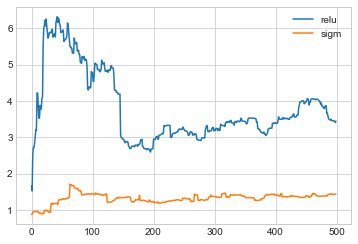

In [139]:
y_train_pred1 = nnGA1.predict(X)
y_train_accuracy1 = accuracy_score(Y, y_train_pred1)
print('Training accuracy: ', y_train_accuracy1)
y_train_pred2 = nnGA2.predict(X)
y_train_accuracy2 = accuracy_score(Y, y_train_pred2)
print('Training accuracy: ', y_train_accuracy2)

plt.plot(nnSA1.fitness_curve, label = "relu")
plt.plot(nnSA2.fitness_curve, label = "sigm")
plt.legend(loc='upper right')

print(nnSA1.loss, nnGA2.loss)

y_test_pred1 = nnGA1.predict(X_test)
y_test_accuracy1 = accuracy_score(Y_test, y_test_pred1)
print('Test accuracy with relu: ', y_test_accuracy1)
y_test_pred2 = nnGA2.predict(X_test)
y_test_accuracy2 = accuracy_score(Y_test, y_test_pred2)
print('Test accuracy with sigmoid: ', y_test_accuracy2)

print(confusion_matrix(Y_test, y_test_pred1))
print(confusion_matrix(Y_test, y_test_pred2))

In [140]:
# now let's tune l.r.:
nnGA1 = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation = 'relu',
                                 algorithm = 'genetic_alg', mutation_prob = 0.05,
                                 max_iters = 500, clip_max = 5, pop_size=50, 
                                 bias = True, is_classifier = True, learning_rate = 4.0,
                                 early_stopping = True, max_attempts = 7,
                                 random_state = 13, curve=True)
nnGA2 = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation = 'sigmoid',
                                 algorithm = 'genetic_alg', mutation_prob = 0.05,                                   
                                 max_iters = 500, clip_max = 5, pop_size=50,
                                 bias = True, is_classifier = True, learning_rate = 4.0,
                                 early_stopping = True, max_attempts = 7,
                                 random_state = 13, curve=True)
nnGA1.fit(X, Y)
nnGA2.fit(X, Y)

NeuralNetwork(activation='sigmoid', algorithm='genetic_alg', clip_max=5,
              curve=True, early_stopping=True, hidden_nodes=[16],
              learning_rate=4.0, max_attempts=7, max_iters=500,
              mutation_prob=0.05, pop_size=50, random_state=13)

Training accuracy:  0.6
Training accuracy:  0.6320388349514563
3.4393968092806353 0.9440651437348532
Test accuracy with relu:  0.535377358490566
Test accuracy with sigmoid:  0.5247641509433962
[[369 350]
 [ 44  85]]
[[349 370]
 [ 33  96]]


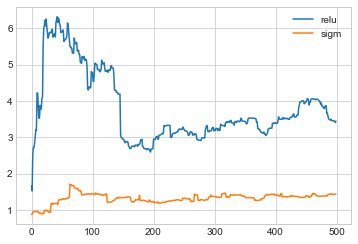

In [141]:
y_train_pred1 = nnGA1.predict(X)
y_train_accuracy1 = accuracy_score(Y, y_train_pred1)
print('Training accuracy: ', y_train_accuracy1)
y_train_pred2 = nnGA2.predict(X)
y_train_accuracy2 = accuracy_score(Y, y_train_pred2)
print('Training accuracy: ', y_train_accuracy2)

plt.plot(nnSA1.fitness_curve, label = "relu")
plt.plot(nnSA2.fitness_curve, label = "sigm")
plt.legend(loc='upper right')

print(nnSA1.loss, nnGA2.loss)

y_test_pred1 = nnGA1.predict(X_test)
y_test_accuracy1 = accuracy_score(Y_test, y_test_pred1)
print('Test accuracy with relu: ', y_test_accuracy1)
y_test_pred2 = nnGA2.predict(X_test)
y_test_accuracy2 = accuracy_score(Y_test, y_test_pred2)
print('Test accuracy with sigmoid: ', y_test_accuracy2)

print(confusion_matrix(Y_test, y_test_pred1))
print(confusion_matrix(Y_test, y_test_pred2))

Now change with l.r., let's decrease it...

In [142]:
# now let's tune mutation_prob
nnGA1 = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation = 'relu',
                                 algorithm = 'genetic_alg', mutation_prob = 0.05,
                                 max_iters = 500, clip_max = 5, pop_size=50, 
                                 bias = True, is_classifier = True, learning_rate = 0.00002,
                                 early_stopping = True, max_attempts = 7,
                                 random_state = 13, curve=True)
nnGA2 = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation = 'sigmoid',
                                 algorithm = 'genetic_alg', mutation_prob = 0.05,                                   
                                 max_iters = 500, clip_max = 5, pop_size=50,
                                 bias = True, is_classifier = True, learning_rate = 0.00002,
                                 early_stopping = True, max_attempts = 7,
                                 random_state = 13, curve=True)
nnGA1.fit(X, Y)
nnGA2.fit(X, Y)

NeuralNetwork(activation='sigmoid', algorithm='genetic_alg', clip_max=5,
              curve=True, early_stopping=True, hidden_nodes=[16],
              learning_rate=2e-05, max_attempts=7, max_iters=500,
              mutation_prob=0.05, pop_size=50, random_state=13)

Training accuracy:  0.6
Training accuracy:  0.6320388349514563
3.4393968092806353 0.9440651437348532
Test accuracy with relu:  0.535377358490566
Test accuracy with sigmoid:  0.5247641509433962
[[369 350]
 [ 44  85]]
[[349 370]
 [ 33  96]]


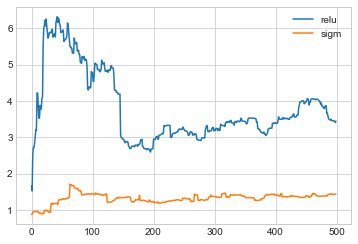

In [143]:
y_train_pred1 = nnGA1.predict(X)
y_train_accuracy1 = accuracy_score(Y, y_train_pred1)
print('Training accuracy: ', y_train_accuracy1)
y_train_pred2 = nnGA2.predict(X)
y_train_accuracy2 = accuracy_score(Y, y_train_pred2)
print('Training accuracy: ', y_train_accuracy2)

plt.plot(nnSA1.fitness_curve, label = "relu")
plt.plot(nnSA2.fitness_curve, label = "sigm")
plt.legend(loc='upper right')

print(nnSA1.loss, nnGA2.loss)

y_test_pred1 = nnGA1.predict(X_test)
y_test_accuracy1 = accuracy_score(Y_test, y_test_pred1)
print('Test accuracy with relu: ', y_test_accuracy1)
y_test_pred2 = nnGA2.predict(X_test)
y_test_accuracy2 = accuracy_score(Y_test, y_test_pred2)
print('Test accuracy with sigmoid: ', y_test_accuracy2)

print(confusion_matrix(Y_test, y_test_pred1))
print(confusion_matrix(Y_test, y_test_pred2))

Yes, as it should be GenAlg has no learning rate:


In [144]:
# now let's tune l.r.:
nnGA1 = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation = 'relu',
                                 algorithm = 'genetic_alg', mutation_prob = 0.05,
                                 max_iters = 500, clip_max = 5, pop_size=50, 
                                 bias = True, is_classifier = True, 
                                 early_stopping = True, max_attempts = 7,
                                 random_state = 13, curve=True)
nnGA2 = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation = 'sigmoid',
                                 algorithm = 'genetic_alg', mutation_prob = 0.05,                                   
                                 max_iters = 500, clip_max = 5, pop_size=50,
                                 bias = True, is_classifier = True, 
                                 early_stopping = True, max_attempts = 7,
                                 random_state = 13, curve=True)
nnGA1.fit(X, Y)
nnGA2.fit(X, Y)

NeuralNetwork(activation='sigmoid', algorithm='genetic_alg', clip_max=5,
              curve=True, early_stopping=True, hidden_nodes=[16],
              max_attempts=7, max_iters=500, mutation_prob=0.05, pop_size=50,
              random_state=13)

Training accuracy:  0.6
Training accuracy:  0.6320388349514563
3.4393968092806353 0.9440651437348532
Test accuracy with relu:  0.535377358490566
Test accuracy with sigmoid:  0.5247641509433962
[[369 350]
 [ 44  85]]
[[349 370]
 [ 33  96]]


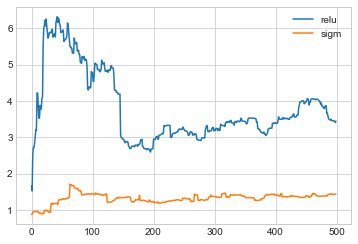

In [145]:
y_train_pred1 = nnGA1.predict(X)
y_train_accuracy1 = accuracy_score(Y, y_train_pred1)
print('Training accuracy: ', y_train_accuracy1)
y_train_pred2 = nnGA2.predict(X)
y_train_accuracy2 = accuracy_score(Y, y_train_pred2)
print('Training accuracy: ', y_train_accuracy2)

plt.plot(nnSA1.fitness_curve, label = "relu")
plt.plot(nnSA2.fitness_curve, label = "sigm")
plt.legend(loc='upper right')

print(nnSA1.loss, nnGA2.loss)

y_test_pred1 = nnGA1.predict(X_test)
y_test_accuracy1 = accuracy_score(Y_test, y_test_pred1)
print('Test accuracy with relu: ', y_test_accuracy1)
y_test_pred2 = nnGA2.predict(X_test)
y_test_accuracy2 = accuracy_score(Y_test, y_test_pred2)
print('Test accuracy with sigmoid: ', y_test_accuracy2)

print(confusion_matrix(Y_test, y_test_pred1))
print(confusion_matrix(Y_test, y_test_pred2))

Accuracy is over 50% and sensitivity is great: 0.66 for Relu and 74.4% for sigmoid